In [1]:
#Importing the pandas library for reading

In [2]:
import pandas as pd

In [6]:
#Reading the dataset

In [7]:
data1 = pd.read_csv('data.csv')

In [8]:
#Checking the info of the dataset

In [9]:
data1.info

<bound method DataFrame.info of            Date     Country  Local Industry Sector Accident Level  \
0    2016-01-01  Country_01      1          Mining              I   
1    2016-01-02  Country_02      2          Mining              I   
2    2016-01-06  Country_01      3          Mining              I   
3    2016-01-08  Country_01      4          Mining              I   
4    2016-01-10  Country_01      4          Mining             IV   
..          ...         ...    ...             ...            ...   
413  2017-07-04  Country_01      4          Mining              I   
414  2017-07-04  Country_01      3          Mining              I   
415  2017-07-05  Country_02      9          Metals              I   
416  2017-07-06  Country_02      5          Metals              I   
417  2017-07-09  Country_01      4          Mining              I   

    Potential Accident Level  Gender      Natureofemployee  \
0                         IV    Male           Third Party   
1              

In [42]:
#Step 1: NLP pre processing

In [10]:
#Prepocessing the text (description column). i.e- removing the stop words and lemmatizing

In [11]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import string
nltk.download('stopwords')
stop=set(stopwords.words('english'))

def preprocess_text(text):
      corpus=[]
      #stem=PorterStemmer()
      lem=WordNetLemmatizer()
      for news in text:
          words=[w for w in word_tokenize(news) if (w not in stop)]
          
          words=[lem.lemmatize(w) for w in words if len(w)>2]
          words = [''.join(c for c in s if c not in string.punctuation) for s in words if s]
          words = [word.lower() for word in words]
          words = [word for word in words if word.isalpha()]
          corpus.append(words) 
         
      return corpus     
      
data1['processed_text']= preprocess_text(data1['Description'])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
#Printing the first 5 elements of the dataset

In [13]:
data1.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Natureofemployee,Critical Risk,Description,Year,Month,Weekday,Season,processed_text
0,2016-01-01,Country_01,1,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,Friday,Summer,"[while, removing, drill, rod, jumbo, maintenan..."
1,2016-01-02,Country_02,2,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,Saturday,Summer,"[during, activation, sodium, sulphide, pump, p..."
2,2016-01-06,Country_01,3,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,Wednesday,Summer,"[substation, milpo, located, level, collaborat..."
3,2016-01-08,Country_01,4,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,Friday,Summer,"[being, approximately, personnel, begin, task,..."
4,2016-01-10,Country_01,4,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,Sunday,Summer,"[approximately, am, circumstance, mechanic, an..."


In [14]:
#Viewing the processed text.

In [15]:
data1['processed_text']

0      [while, removing, drill, rod, jumbo, maintenan...
1      [during, activation, sodium, sulphide, pump, p...
2      [substation, milpo, located, level, collaborat...
3      [being, approximately, personnel, begin, task,...
4      [approximately, am, circumstance, mechanic, an...
                             ...                        
413    [being, approximately, am, approximately, lift...
414    [the, collaborator, moved, infrastructure, off...
415    [during, environmental, monitoring, activity, ...
416    [the, employee, performed, activity, stripping...
417    [am, assistant, cleaned, floor, module, centra...
Name: processed_text, Length: 418, dtype: object

It can be observed that the processed_text doesn't consist any stop words and it is lemmatized

In [16]:
#Finding and printing the maximum length of the sentence in the processed text

In [17]:
lgt = []
for i in data1['processed_text']:
  lgt.append(len(i))
print('Maximum length of the sentence in processed text (in list) :',max(lgt))

Maximum length of the sentence in processed text (in list) : 95


In [18]:
desc_processed = []
for i in range(len(data1['processed_text'])):
   desc_processed.append(' '.join(wrd for wrd in data1.iloc[:,14][i]))

In [19]:
data1['description_processed'] = desc_processed

In [20]:
data1.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Natureofemployee,Critical Risk,Description,Year,Month,Weekday,Season,processed_text,description_processed
0,2016-01-01,Country_01,1,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,Friday,Summer,"[while, removing, drill, rod, jumbo, maintenan...",while removing drill rod jumbo maintenance sup...
1,2016-01-02,Country_02,2,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,Saturday,Summer,"[during, activation, sodium, sulphide, pump, p...",during activation sodium sulphide pump piping ...
2,2016-01-06,Country_01,3,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,Wednesday,Summer,"[substation, milpo, located, level, collaborat...",substation milpo located level collaborator ex...
3,2016-01-08,Country_01,4,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,Friday,Summer,"[being, approximately, personnel, begin, task,...",being approximately personnel begin task unloc...
4,2016-01-10,Country_01,4,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,Sunday,Summer,"[approximately, am, circumstance, mechanic, an...",approximately am circumstance mechanic anthony...


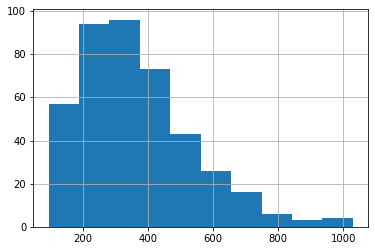

In [21]:
#Number of characters present in each sentence
data1['Description'].str.len().hist();

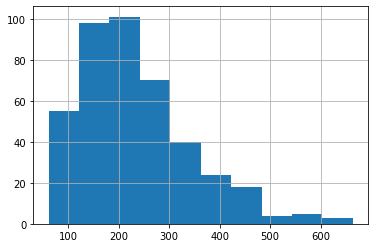

In [22]:
data1['description_processed'].str.len().hist();

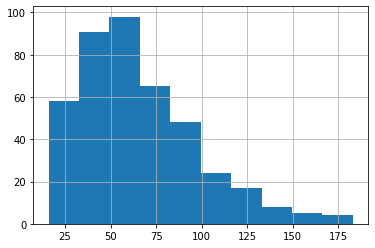

In [23]:
#Number of words appearing in each description
data1['Description'].str.split().map(lambda x: len(x)).hist();

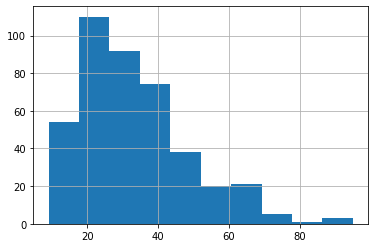

In [24]:
data1['description_processed'].str.split().map(lambda x: len(x)).hist();

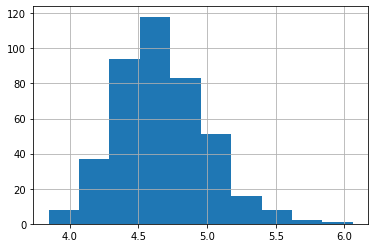

In [25]:
#Average word length
import numpy as np
data1['Description'].str.split().apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist();

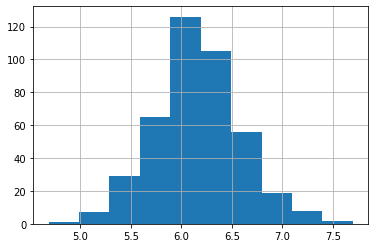

In [26]:
data1['description_processed'].str.split().apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist();

In [27]:
#N-gram analysis
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams= get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

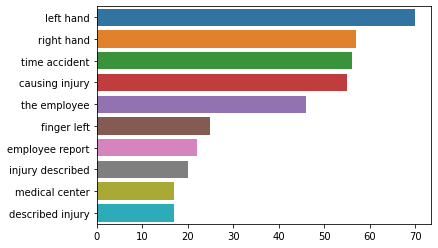

In [28]:
#Bigram analysis
plot_top_ngrams_barchart(data1['description_processed'],2)

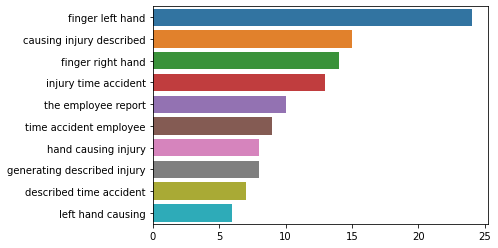

In [29]:
#Trigram analysis
plot_top_ngrams_barchart(data1['description_processed'],3)

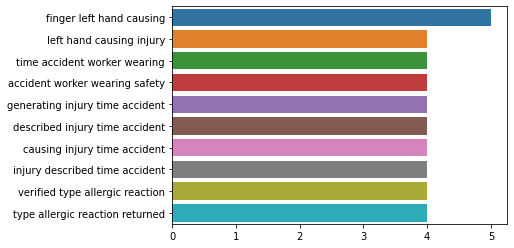

In [30]:
#For n=4
plot_top_ngrams_barchart(data1['description_processed'],4)

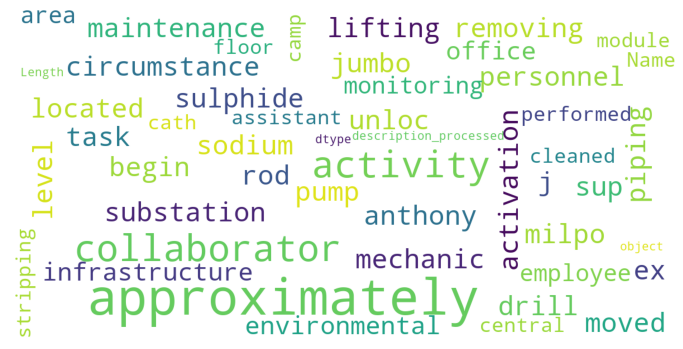

In [31]:
#Wordcloud
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
desc = data1['description_processed']
wordcloud=wordcloud.generate(str(desc))

fig = plt.figure(1, figsize=(12, 12)) 
plt.axis('off')
 
plt.imshow(wordcloud)
plt.show()


In [32]:
#Model building 
#Bag of words
#Target variable- accident level


In [34]:
#Count vectorization
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X = data1['description_processed']
y = data1['Accident Level']

count_vec = CountVectorizer(analyzer='word', ngram_range=(1, 2))
Xc = count_vec.fit_transform(X).toarray()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, y, test_size=0.15, random_state=42)

In [35]:
#Printing the unique values of accident level

In [36]:
data1['Accident Level'].unique()

array(['I', 'IV', 'III', 'II', 'V'], dtype=object)

In [37]:
#Shape of the Xc_train

In [38]:
Xc_train.shape

(355, 13242)

In [39]:
#Shape of Xc_test

In [40]:
Xc_test.shape

(63, 13242)

In [43]:
#Step 2: Design, train and test machine learning classifiers 

In [44]:
#SVC

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
model_c = SVC()
model_c.fit(Xc_train, yc_train)
 
# print prediction results
predictions = model_c.predict(Xc_test)
print(classification_report(yc_test, predictions))

              precision    recall  f1-score   support

           I       0.76      1.00      0.86        48
          II       0.00      0.00      0.00         5
         III       0.00      0.00      0.00         4
          IV       0.00      0.00      0.00         5
           V       0.00      0.00      0.00         1

    accuracy                           0.76        63
   macro avg       0.15      0.20      0.17        63
weighted avg       0.58      0.76      0.66        63



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
#Printing the accuracy scores

In [48]:
acc = accuracy_score(yc_test,predictions)
acc_svc_t = model_c.score(Xc_train, yc_train)
print("Train accuracy of the SVC model : {:.2f}".format(acc_svc_t*100))
print("Test accuracy of the SVC model : {:.2f}".format(acc*100))


Train accuracy of the SVC model : 81.69
Test accuracy of the SVC model : 76.19


In [49]:
#Tuning the model with gridsearchCV

In [50]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(Xc_train, yc_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.746 total time=   1.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.732 total time=   0.9s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.732 total time=   1.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.732 total time=   0.9s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.732 total time=   0.9s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.746 total time=   1.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.732 total time=   1.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.732 total time=   1.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.732 total time=   1.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.732 total time=   1.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.746 total time=   0.9s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [51]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=0.1, gamma=1)


In [52]:
grid_predictions = grid.predict(Xc_test)
 
# print classification report
print(classification_report(yc_test, grid_predictions))

              precision    recall  f1-score   support

           I       0.76      1.00      0.86        48
          II       0.00      0.00      0.00         5
         III       0.00      0.00      0.00         4
          IV       0.00      0.00      0.00         5
           V       0.00      0.00      0.00         1

    accuracy                           0.76        63
   macro avg       0.15      0.20      0.17        63
weighted avg       0.58      0.76      0.66        63



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
# LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import LinearSVC

svc = LinearSVC( max_iter=2500)
svc.fit(Xc_train, yc_train)
yc_pred_SVC = svc.predict(Xc_test)

In [54]:
acc_svc = accuracy_score(yc_test, yc_pred_SVC)
acc_svc_tr = svc.score(Xc_train, yc_train)
print("Train accuracy of the SVC model : {:.2f}".format(acc_svc_tr*100))
print("Test accuracy of the SVC model : {:.2f}".format(acc_svc*100))


Train accuracy of the SVC model : 99.44
Test accuracy of the SVC model : 76.19


In [55]:
print('Classification report:',classification_report(yc_test, yc_pred_SVC))

Classification report:               precision    recall  f1-score   support

           I       0.80      0.98      0.88        48
          II       0.00      0.00      0.00         5
         III       0.50      0.25      0.33         4
          IV       0.00      0.00      0.00         5
           V       0.00      0.00      0.00         1

    accuracy                           0.76        63
   macro avg       0.26      0.25      0.24        63
weighted avg       0.64      0.76      0.69        63



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
print('Confusion matrix:', confusion_matrix(yc_test,yc_pred_SVC))

Confusion matrix: [[47  1  0  0  0]
 [ 5  0  0  0  0]
 [ 3  0  1  0  0]
 [ 3  1  1  0  0]
 [ 1  0  0  0  0]]


In [57]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
rfc.fit(Xc_train, yc_train)
yc_pred_rfc = rfc.predict(Xc_test)

acc_rfc = accuracy_score(yc_test, yc_pred_rfc)
acc_rfc_tr = rfc.score(Xc_train,yc_train)

print("Train Accuracy of the Random Forest model : {:.2f}".format(acc_rfc_tr*100))
print("Test Accuracy of the Random Forest model : {:.2f}".format(acc_rfc*100))
print('Classification report:',classification_report(yc_test, yc_pred_rfc))
print('Confusion matrix:', confusion_matrix(yc_test,yc_pred_rfc))

Train Accuracy of the Random Forest model : 99.44
Test Accuracy of the Random Forest model : 76.19
Classification report:               precision    recall  f1-score   support

           I       0.76      1.00      0.86        48
          II       0.00      0.00      0.00         5
         III       0.00      0.00      0.00         4
          IV       0.00      0.00      0.00         5
           V       0.00      0.00      0.00         1

    accuracy                           0.76        63
   macro avg       0.15      0.20      0.17        63
weighted avg       0.58      0.76      0.66        63

Confusion matrix: [[48  0  0  0  0]
 [ 5  0  0  0  0]
 [ 4  0  0  0  0]
 [ 5  0  0  0  0]
 [ 1  0  0  0  0]]


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
#Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100)
gbc.fit(Xc_train, yc_train)
yc_pred_gb = gbc.predict(Xc_test)
acc_gbc = accuracy_score(yc_test, yc_pred_gb)
acc_gbc_tr = gbc.score(Xc_train,yc_train)

print(" Test accuracy of the Gradient boosting model : {:.2f}".format(acc_gbc*100))
print("Train accuracy of the Gradient boosting model : {:.2f}".format(acc_gbc_tr*100))
print('Classification report:',classification_report(yc_test,yc_pred_gb ))

 Test accuracy of the Gradient boosting model : 71.43
Train accuracy of the Gradient boosting model : 99.44
Classification report:               precision    recall  f1-score   support

           I       0.79      0.94      0.86        48
          II       0.00      0.00      0.00         5
         III       0.00      0.00      0.00         4
          IV       0.00      0.00      0.00         5
           V       0.00      0.00      0.00         1

    accuracy                           0.71        63
   macro avg       0.16      0.19      0.17        63
weighted avg       0.60      0.71      0.65        63



In [59]:
print('Confusion matrix:', confusion_matrix(yc_test,yc_pred_gb))

Confusion matrix: [[45  1  0  1  1]
 [ 5  0  0  0  0]
 [ 3  0  0  1  0]
 [ 3  0  2  0  0]
 [ 1  0  0  0  0]]


In [60]:
#XGBOOST
from xgboost import XGBClassifier

xgbc = XGBClassifier()
xgbc.fit(Xc_train, yc_train)
yc_pred_xg = xgbc.predict(Xc_test)
acc_xgbc = accuracy_score(yc_test, yc_pred_xg)
acc_xgbc_tr = xgbc.score(Xc_train,yc_train)

print(" Test accuracy of the XGBoost model : {:.2f}".format(acc_xgbc*100))
print("Train accuracy of the XGBoost model : {:.2f}".format(acc_xgbc_tr*100))
print('Classification report:',classification_report(yc_test,yc_pred_xg))
print('Confusion matrix:', confusion_matrix(yc_test,yc_pred_xg))


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:14:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 Test accuracy of the XGBoost model : 66.67
Train accuracy of the XGBoost model : 99.44
Classification report:               precision    recall  f1-score   support

           I       0.75      0.88      0.81        48
          II       0.00      0.00      0.00         5
         III       0.00      0.00      0.00         4
          IV       0.00      0.00      0.00         5
           V       0.00      0.00      0.00         1

    accuracy                           0.67        63
   macro avg       0.15      0.17      0.16        63
weighted avg       0.57      0.67      0.62        63

Confusion matrix: [[42  3  1  0  2]
 [ 5  0  0  0  0]
 [ 4  0  0  0  0]
 [ 4  0  0  0  1]

D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
#Kneighbours classifier
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(Xc_train, yc_train)

KNeighborsClassifier(n_neighbors=3)

In [62]:
yc_pred_k = neigh.predict(Xc_test)
acc_neigh = accuracy_score(yc_test, yc_pred_k)
acc_neigh_tr = neigh.score(Xc_train,yc_train)


In [63]:
print(" Test accuracy of the KNeighbours model : {:.2f}".format(acc_neigh*100))
print("Train accuracy of the Kneighbours model : {:.2f}".format(acc_neigh_tr*100))
print('Classification report:',classification_report(yc_test,yc_pred_k))
print('Confusion matrix:', confusion_matrix(yc_test,yc_pred_k))


 Test accuracy of the KNeighbours model : 76.19
Train accuracy of the Kneighbours model : 74.08
Classification report:               precision    recall  f1-score   support

           I       0.77      1.00      0.87        48
          II       0.00      0.00      0.00         5
         III       0.00      0.00      0.00         4
          IV       0.00      0.00      0.00         5
           V       0.00      0.00      0.00         1

    accuracy                           0.76        63
   macro avg       0.15      0.20      0.17        63
weighted avg       0.59      0.76      0.66        63

Confusion matrix: [[48  0  0  0  0]
 [ 5  0  0  0  0]
 [ 4  0  0  0  0]
 [ 4  1  0  0  0]
 [ 1  0  0  0  0]]


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
#naive bayes
from sklearn.naive_bayes import GaussianNB
g_model1 = GaussianNB()
g_model1.fit(Xc_train, yc_train)
g_pred1 = g_model1.predict(Xc_test)

#print('Accuracy on Training data:',g_model1.score(Xc_train, yc_train) ) #accuracy of training data
#print('Accuracy on Test data:',g_model1.score(Xc_test, yc_test) ) #accuracy data of testing data

In [65]:
print('Accuracy on Training data:',g_model1.score(Xc_train, yc_train) ) #accuracy of training data
print('Accuracy on Test data:',g_model1.score(Xc_test, yc_test) ) #accuracy data of testing data

Accuracy on Training data: 0.9943661971830986
Accuracy on Test data: 0.746031746031746


In [66]:
print('Classification report:',classification_report(yc_test,g_pred1))
print('Confusion matrix:', confusion_matrix(yc_test,g_pred1))

Classification report:               precision    recall  f1-score   support

           I       0.76      0.98      0.85        48
          II       0.00      0.00      0.00         5
         III       0.00      0.00      0.00         4
          IV       0.00      0.00      0.00         5
           V       0.00      0.00      0.00         1

    accuracy                           0.75        63
   macro avg       0.15      0.20      0.17        63
weighted avg       0.58      0.75      0.65        63

Confusion matrix: [[47  0  0  1  0]
 [ 5  0  0  0  0]
 [ 4  0  0  0  0]
 [ 5  0  0  0  0]
 [ 1  0  0  0  0]]


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
#Bagging

In [69]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
n_estimators = [10,30,50,70,80,150,160, 170,175,180,185];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

parameters_b = {'n_estimators':n_estimators,
              
        }
grid_b = GridSearchCV(BaggingClassifier(base_estimator= None, ## If None, then the base estimator is a decision tree.
                                      bootstrap_features=False),
                                 param_grid=parameters_b,
                                 cv=cv,
                                 n_jobs = -1)
grid_b.fit(Xc_train, yc_train) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [10, 30, 50, 70, 80, 150, 160, 170,
                                          175, 180, 185]})

In [70]:
yc_pred_b = grid_b.predict(Xc_test)
acc_b = accuracy_score(yc_test, yc_pred_b)
acc_b_tr = grid_b.score(Xc_train,yc_train)

print(" Test accuracy of the Bagging model : {:.2f}".format(acc_b*100))
print("Train accuracy of the Bagging model : {:.2f}".format(acc_b_tr*100))
print('Classification report:',classification_report(yc_test,yc_pred_b))
print('Confusion matrix:', confusion_matrix(yc_test,yc_pred_b))

 Test accuracy of the Bagging model : 76.19
Train accuracy of the Bagging model : 99.44
Classification report:               precision    recall  f1-score   support

           I       0.77      1.00      0.87        48
          II       0.00      0.00      0.00         5
         III       0.00      0.00      0.00         4
          IV       0.00      0.00      0.00         5
           V       0.00      0.00      0.00         1

    accuracy                           0.76        63
   macro avg       0.15      0.20      0.17        63
weighted avg       0.59      0.76      0.66        63

Confusion matrix: [[48  0  0  0  0]
 [ 5  0  0  0  0]
 [ 4  0  0  0  0]
 [ 4  0  1  0  0]
 [ 1  0  0  0  0]]


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
#ADABOOST

In [72]:
from sklearn.ensemble import AdaBoostClassifier
clf_ada = AdaBoostClassifier(n_estimators=100, random_state=0)
clf_ada.fit(Xc_train, yc_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [73]:
yc_pred_ada = clf_ada.predict(Xc_test)
acc_ada = accuracy_score(yc_test, yc_pred_ada)
acc_ada_tr = clf_ada.score(Xc_train,yc_train)

print(" Test accuracy of the ADA model : {:.2f}".format(acc_ada*100))
print("Train accuracy of the ADA model : {:.2f}".format(acc_ada_tr*100))
print('Classification report:',classification_report(yc_test,yc_pred_ada))
print('Confusion matrix:', confusion_matrix(yc_test,yc_pred_ada))

 Test accuracy of the ADA model : 73.02
Train accuracy of the ADA model : 75.77
Classification report:               precision    recall  f1-score   support

           I       0.75      0.96      0.84        48
          II       0.00      0.00      0.00         5
         III       0.00      0.00      0.00         4
          IV       0.00      0.00      0.00         5
           V       0.00      0.00      0.00         1

    accuracy                           0.73        63
   macro avg       0.15      0.19      0.17        63
weighted avg       0.57      0.73      0.64        63

Confusion matrix: [[46  1  0  1  0]
 [ 5  0  0  0  0]
 [ 4  0  0  0  0]
 [ 5  0  0  0  0]
 [ 1  0  0  0  0]]


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
#Target variable- potential accident level


In [75]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X1 = data1['description_processed']
yp = data1['Potential Accident Level']

cnt_vecp = CountVectorizer(analyzer='word', ngram_range=(1, 2))
Xp = cnt_vecp.fit_transform(X1).toarray()
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp, yp, test_size=0.15, random_state=42)

In [76]:
#Shape of training data
Xp_train.shape

(355, 13242)

In [77]:
#Shape of testing data
Xp_test.shape

(63, 13242)

In [78]:
#SVC
from sklearn.svm import SVC
model_p1 = SVC()
model_p1.fit(Xp_train, yp_train)
 
# print prediction results
predictions_p = model_p1.predict(Xp_test)
print(classification_report(yp_test, predictions_p))

              precision    recall  f1-score   support

           I       1.00      0.14      0.25         7
          II       0.60      0.27      0.37        11
         III       0.40      0.42      0.41        19
          IV       0.43      0.70      0.53        23
           V       0.00      0.00      0.00         3

    accuracy                           0.44        63
   macro avg       0.49      0.31      0.31        63
weighted avg       0.49      0.44      0.41        63



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
acc_p1 = accuracy_score(yp_test, predictions_p)
acc_svc_tp1 = model_p1.score(Xp_train, yp_train)
print("Train accuracy of the SVC model : {:.2f}".format(acc_svc_tp1*100))
print("Test accuracy of the SVC model : {:.2f}".format(acc_p1*100))


Train accuracy of the SVC model : 91.83
Test accuracy of the SVC model : 44.44


In [81]:
#Tuning
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid_p = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid_p = GridSearchCV(SVC(), param_grid_p, refit = True, verbose = 3)
 
# fitting the model for grid search
grid_p.fit(Xp_train, yp_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.338 total time=   0.8s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.338 total time=   0.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.338 total time=   0.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.324 total time=   0.9s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.324 total time=   0.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.338 total time=   0.9s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.338 total time=   0.8s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.338 total time=   0.9s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.324 total time=   0.9s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.324 total time=   1.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.338 total time=   1.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.338 total time=   1.0s
[CV 3/5] END .....C=0.1, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [82]:
grid_predictions_p = grid_p.predict(Xp_test)
 
# print classification report
print(classification_report(yp_test, grid_predictions_p))

              precision    recall  f1-score   support

           I       1.00      0.14      0.25         7
          II       0.55      0.55      0.55        11
         III       0.39      0.37      0.38        19
          IV       0.52      0.74      0.61        23
           V       0.00      0.00      0.00         3

    accuracy                           0.49        63
   macro avg       0.49      0.36      0.36        63
weighted avg       0.51      0.49      0.46        63



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
#LinearSVC
svc_1 = LinearSVC( max_iter=5500)
svc_1.fit(Xp_train, yp_train)
yp_predsvc_1 = svc_1.predict(Xp_test)

# Evaluation
accp_svc = accuracy_score(yp_test, yp_predsvc_1)
accp_svc_tr = svc_1.score(Xp_train,yp_train)

print("Test accuracy of the SVC model : {:.2f}".format(accp_svc*100))
print("Train accuracy of the SVC model : {:.2f}".format(accp_svc_tr*100))

Test accuracy of the SVC model : 44.44
Train accuracy of the SVC model : 99.72


In [85]:
print('Classification report:',classification_report(yp_test, yp_predsvc_1))
print('Confusion matrix:', confusion_matrix(yp_test,yp_predsvc_1))

Classification report:               precision    recall  f1-score   support

           I       0.50      0.14      0.22         7
          II       0.46      0.55      0.50        11
         III       0.35      0.32      0.33        19
          IV       0.48      0.65      0.56        23
           V       0.00      0.00      0.00         3

    accuracy                           0.44        63
   macro avg       0.36      0.33      0.32        63
weighted avg       0.42      0.44      0.42        63

Confusion matrix: [[ 1  1  4  1  0]
 [ 0  6  2  3  0]
 [ 0  3  6 10  0]
 [ 1  3  4 15  0]
 [ 0  0  1  2  0]]


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
#Random Forest model Training and Evaluation
rf1 = RandomForestClassifier(random_state=42)
rf1.fit(Xp_train, yp_train)
yp_pred_rf = rf1.predict(Xp_test)

#Evaluation
accp_rfc = accuracy_score(yp_test, yp_pred_rf)
accp_rfc_tr = rf1.score(Xp_train,yp_train)

print("Test accuracy of the Random Forest model : {:.2f}".format(accp_rfc*100))
print("Train accuracy of the Random Forest model : {:.2f}".format(accp_rfc_tr*100))

Test accuracy of the Random Forest model : 38.10
Train accuracy of the Random Forest model : 99.72


In [87]:
print('Classification report:',classification_report(yp_test, yp_pred_rf))
print('Confusion matrix:', confusion_matrix(yp_test,yp_pred_rf))

Classification report:               precision    recall  f1-score   support

           I       0.50      0.14      0.22         7
          II       0.50      0.27      0.35        11
         III       0.45      0.26      0.33        19
          IV       0.34      0.65      0.45        23
           V       0.00      0.00      0.00         3

    accuracy                           0.38        63
   macro avg       0.36      0.27      0.27        63
weighted avg       0.40      0.38      0.35        63

Confusion matrix: [[ 1  0  0  6  0]
 [ 0  3  2  6  0]
 [ 0  0  5 14  0]
 [ 1  3  4 15  0]
 [ 0  0  0  3  0]]


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
#Gradient Boosting Model Building and Evaluation
gb_1 = GradientBoostingClassifier(n_estimators=100,)
gb_1.fit(Xp_train, yp_train)
yp_pred_gb1 = gb_1.predict(Xp_test)
accp_gbc = accuracy_score(yp_test, yp_pred_gb1)
accp_gbc_tr = gb_1.score(Xp_train,yp_train)

print("Test accuracy of the Gradient boosting model : {:.2f}".format(accp_gbc*100))
print("Train accuracy of the Gradient boosting model : {:.2f}".format(accp_gbc_tr*100))

Test accuracy of the Gradient boosting model : 38.10
Train accuracy of the Gradient boosting model : 99.72


In [89]:
print('Classification report:',classification_report(yp_test,yp_pred_gb1 ))
print('Confusion matrix:', confusion_matrix(yp_test,yp_pred_gb1))

Classification report:               precision    recall  f1-score   support

           I       0.50      0.14      0.22         7
          II       0.60      0.27      0.37        11
         III       0.25      0.21      0.23        19
          IV       0.41      0.70      0.52        23
           V       0.00      0.00      0.00         3

    accuracy                           0.38        63
   macro avg       0.35      0.26      0.27        63
weighted avg       0.39      0.38      0.35        63

Confusion matrix: [[ 1  1  4  1  0]
 [ 0  3  3  4  1]
 [ 0  0  4 15  0]
 [ 1  1  5 16  0]
 [ 0  0  0  3  0]]


In [90]:
#XGBoost Model for Training and Evaluation
xgb_1 = XGBClassifier()
xgb_1.fit(Xp_train, yp_train)
yp_pred_xgb = xgb_1.predict(Xp_test)
accp_xgbc = accuracy_score(yp_test, yp_pred_xgb)
accp_xgbc_tr = xgb_1.score(Xp_train,yp_train)

print("Test accuracy of the XGBoost model : {:.2f}".format(accp_xgbc*100))
print("Train accuracy of the XGBoost model : {:.2f}".format(accp_xgbc_tr*100))

D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test accuracy of the XGBoost model : 39.68
Train accuracy of the XGBoost model : 99.72


In [92]:
print('Classification report:',classification_report(yp_test,yp_pred_xgb))
print('Confusion matrix:', confusion_matrix(yp_test,yp_pred_xgb))

Classification report:               precision    recall  f1-score   support

           I       1.00      0.14      0.25         7
          II       0.31      0.45      0.37        11
         III       0.38      0.26      0.31        19
          IV       0.42      0.61      0.50        23
           V       0.00      0.00      0.00         3

    accuracy                           0.40        63
   macro avg       0.42      0.29      0.29        63
weighted avg       0.44      0.40      0.37        63

Confusion matrix: [[ 1  2  3  1  0]
 [ 0  5  2  4  0]
 [ 0  3  5 11  0]
 [ 0  6  3 14  0]
 [ 0  0  0  3  0]]


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
#Kneighbours
from sklearn.neighbors import KNeighborsClassifier
neigh_1 = KNeighborsClassifier(n_neighbors=3)
neigh_1.fit(Xp_train, yp_train)

KNeighborsClassifier(n_neighbors=3)

In [94]:
yp_pred_k1 = neigh_1.predict(Xp_test)
acc_neigh1 = accuracy_score(yp_test, yp_pred_k1)
acc_neigh_tr1 = neigh_1.score(Xp_train,yp_train)


In [95]:
print(" Test accuracy of the KNeighbours model : {:.2f}".format(acc_neigh1*100))
print("Train accuracy of the Kneighbours model : {:.2f}".format(acc_neigh_tr1*100))
print('Classification report:',classification_report(yp_test,yp_pred_k1))
print('Confusion matrix:', confusion_matrix(yp_test,yp_pred_k1))

 Test accuracy of the KNeighbours model : 25.40
Train accuracy of the Kneighbours model : 54.65
Classification report:               precision    recall  f1-score   support

           I       1.00      0.14      0.25         7
          II       0.18      0.45      0.26        11
         III       0.31      0.53      0.39        19
          IV       0.00      0.00      0.00        23
           V       0.00      0.00      0.00         3

    accuracy                           0.25        63
   macro avg       0.30      0.22      0.18        63
weighted avg       0.24      0.25      0.19        63

Confusion matrix: [[ 1  3  3  0  0]
 [ 0  5  5  1  0]
 [ 0  9 10  0  0]
 [ 0  9 14  0  0]
 [ 0  2  0  1  0]]


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
#naive bayes
from sklearn.naive_bayes import GaussianNB
g_model2 = GaussianNB()
g_model2.fit(Xp_train, yp_train)
g_pred2 = g_model2.predict(Xp_test)

In [97]:
print('Accuracy on Training data:',g_model2.score(Xp_train, yp_train) ) #accuracy of training data
print('Accuracy on Test data:',g_model2.score(Xp_test, yp_test) ) #accuracy data of testing data

Accuracy on Training data: 0.9971830985915493
Accuracy on Test data: 0.42857142857142855


In [98]:
print('Classification report:',classification_report(yp_test,g_pred2))
print('Confusion matrix:', confusion_matrix(yp_test,g_pred2))

Classification report:               precision    recall  f1-score   support

           I       0.25      0.14      0.18         7
          II       0.44      0.36      0.40        11
         III       0.40      0.32      0.35        19
          IV       0.46      0.70      0.55        23
           V       0.00      0.00      0.00         3

    accuracy                           0.43        63
   macro avg       0.31      0.30      0.30        63
weighted avg       0.39      0.43      0.40        63

Confusion matrix: [[ 1  3  2  1  0]
 [ 1  4  1  5  0]
 [ 0  1  6 12  0]
 [ 2  0  5 16  0]
 [ 0  1  1  1  0]]


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
#Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit
n_estimators1 = [10,30,50,70,80,150,160, 170,175,180,185];
cv1 = ShuffleSplit(n_splits=10, test_size=.30, random_state=15)

parameters_b1 = {'n_estimators':n_estimators1,
              
        }
grid_b1 = GridSearchCV(BaggingClassifier(base_estimator= None, ## If None, then the base estimator is a decision tree.
                                      bootstrap_features=False),
                                 param_grid=parameters1,
                                 cv=cv1,
                                 n_jobs = -1)


In [102]:
grid_b1.fit(Xp_train, yp_train) 

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=15, test_size=0.3, train_size=None),
             estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [10, 30, 50, 70, 80, 150, 160, 170,
                                          175, 180, 185]})

In [103]:
yp_pred_b1 = grid_b1.predict(Xp_test)
acc_b1 = accuracy_score(yp_test, yp_pred_b1)
acc_b1_tr = grid_b1.score(Xp_train,yp_train)

print(" Test accuracy of the Bagging model : {:.2f}".format(acc_b1*100))
print("Train accuracy of the Bagging model : {:.2f}".format(acc_b1_tr*100))
print('Classification report:',classification_report(yp_test,yp_pred_b1))
print('Confusion matrix:', confusion_matrix(yp_test,yp_pred_b1))

 Test accuracy of the Bagging model : 36.51
Train accuracy of the Bagging model : 99.72
Classification report:               precision    recall  f1-score   support

           I       1.00      0.14      0.25         7
          II       0.20      0.18      0.19        11
         III       0.38      0.26      0.31        19
          IV       0.38      0.65      0.48        23
           V       0.00      0.00      0.00         3

    accuracy                           0.37        63
   macro avg       0.39      0.25      0.25        63
weighted avg       0.40      0.37      0.33        63

Confusion matrix: [[ 1  2  1  3  0]
 [ 0  2  3  6  0]
 [ 0  2  5 12  0]
 [ 0  4  4 15  0]
 [ 0  0  0  3  0]]


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [104]:
#ADA boosting
from sklearn.ensemble import AdaBoostClassifier
clf_ada1 = AdaBoostClassifier(n_estimators=100, random_state=0)
clf_ada1.fit(Xp_train, yp_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [105]:
yp_pred_ada1 = clf_ada1.predict(Xp_test)
acc_ada1 = accuracy_score(yp_test, yp_pred_ada1)
acc_ada1_tr = clf_ada1.score(Xp_train,yp_train)

print(" Test accuracy of the ADA model : {:.2f}".format(acc_ada1*100))
print("Train accuracy of the ADA model : {:.2f}".format(acc_ada1_tr*100))
print('Classification report:',classification_report(yp_test,yp_pred_ada1))
print('Confusion matrix:', confusion_matrix(yp_test,yp_pred_ada1))

 Test accuracy of the ADA model : 36.51
Train accuracy of the ADA model : 43.38
Classification report:               precision    recall  f1-score   support

           I       1.00      0.14      0.25         7
          II       0.25      0.18      0.21        11
         III       0.00      0.00      0.00        19
          IV       0.39      0.78      0.52        23
           V       0.29      0.67      0.40         3

    accuracy                           0.37        63
   macro avg       0.39      0.35      0.28        63
weighted avg       0.31      0.37      0.27        63

Confusion matrix: [[ 1  0  1  5  0]
 [ 0  2  0  8  1]
 [ 0  4  0 14  1]
 [ 0  2  0 18  3]
 [ 0  0  0  1  2]]


In [106]:
#TF-IDF
#Target variable- accident level


In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(ngram_range=(1,2))
Xt = tfidf_vec.fit_transform(X).toarray()

Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, y, test_size=0.15, random_state=42)

In [108]:
#SVC Model Training and Evaluation
svctf = LinearSVC(max_iter=5500)
svctf.fit(Xt_train, yt_train)
yt_pred_tf = svctf.predict(Xt_test)

# Evaluation
acct_svctf = accuracy_score(yt_test, yt_pred_tf)
acct_svctf_tr = svctf.score(Xt_train,yt_train)

print("Test accuracy of the SVC model : {:.2f}".format(acct_svctf*100))
print("Train accuracy of the SVC model : {:.2f}".format(acct_svctf_tr*100))

Test accuracy of the SVC model : 76.19
Train accuracy of the SVC model : 99.15


In [109]:
print('Classification report:',classification_report(yt_test,yt_pred_tf))
print('Confusion matrix:', confusion_matrix(yt_test,yt_pred_tf))

Classification report:               precision    recall  f1-score   support

           I       0.76      1.00      0.86        48
          II       0.00      0.00      0.00         5
         III       0.00      0.00      0.00         4
          IV       0.00      0.00      0.00         5
           V       0.00      0.00      0.00         1

    accuracy                           0.76        63
   macro avg       0.15      0.20      0.17        63
weighted avg       0.58      0.76      0.66        63

Confusion matrix: [[48  0  0  0  0]
 [ 5  0  0  0  0]
 [ 4  0  0  0  0]
 [ 5  0  0  0  0]
 [ 1  0  0  0  0]]


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
#Random Forest model Training and Evaluation
rfc_tf = RandomForestClassifier(random_state=42)
rfc_tf.fit(Xt_train, yt_train)
yt_pred_rftf = rfc_tf.predict(Xt_test)

acct_rfc_tf = accuracy_score(yt_test, yt_pred_rftf)
acct_rfc_tf_tr = rfc_tf.score(Xt_train,yt_train)

print("Test accuracy of the Random Forest model : {:.2f}".format(acct_rfc_tf*100))
print("Train accuracy of the Random Forest model : {:.2f}".format(acct_rfc_tf_tr*100))

Test accuracy of the Random Forest model : 76.19
Train accuracy of the Random Forest model : 99.44


In [111]:
print('Classification report:',classification_report(yt_test,yt_pred_rftf))
print('Confusion matrix:', confusion_matrix(yt_test,yt_pred_rftf))

Classification report:               precision    recall  f1-score   support

           I       0.76      1.00      0.86        48
          II       0.00      0.00      0.00         5
         III       0.00      0.00      0.00         4
          IV       0.00      0.00      0.00         5
           V       0.00      0.00      0.00         1

    accuracy                           0.76        63
   macro avg       0.15      0.20      0.17        63
weighted avg       0.58      0.76      0.66        63

Confusion matrix: [[48  0  0  0  0]
 [ 5  0  0  0  0]
 [ 4  0  0  0  0]
 [ 5  0  0  0  0]
 [ 1  0  0  0  0]]


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [112]:
#Gradient Boosting Model Building and Evaluation
from sklearn.ensemble import GradientBoostingClassifier
gb_tf = GradientBoostingClassifier(n_estimators=100)
gb_tf.fit(Xt_train, yt_train)
yt_pred_gbtf = gb_tf.predict(Xt_test)
acct_gb_tf = accuracy_score(yt_test,yt_pred_gbtf )
acct_gb_tf_tr = gb_tf.score(Xt_train,yt_train)

print("Train accuracy of the Gradient boosting model : {:.2f}".format(acct_gb_tf*100))
print("Test accuracy of the Gradient boosting model : {:.2f}".format(acct_gb_tf_tr*100))
print('Classification report:',classification_report(yt_test,yt_pred_gbtf ))

Train accuracy of the Gradient boosting model : 69.84
Test accuracy of the Gradient boosting model : 99.44
Classification report:               precision    recall  f1-score   support

           I       0.77      0.92      0.84        48
          II       0.00      0.00      0.00         5
         III       0.00      0.00      0.00         4
          IV       0.00      0.00      0.00         5
           V       0.00      0.00      0.00         1

    accuracy                           0.70        63
   macro avg       0.15      0.18      0.17        63
weighted avg       0.59      0.70      0.64        63



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [113]:
print('Confusion matrix:', confusion_matrix(yt_test,yt_pred_gbtf))

Confusion matrix: [[44  1  2  1  0]
 [ 5  0  0  0  0]
 [ 4  0  0  0  0]
 [ 3  0  2  0  0]
 [ 1  0  0  0  0]]


In [114]:
#XGBoost Model for Training and Evaluation
xgb_tf = XGBClassifier()
xgb_tf.fit(Xt_train, yt_train)
yt_predxgb_tf = xgb_tf.predict(Xt_test)
acct_xgb_tf = accuracy_score(yt_test, yt_predxgb_tf)
acct_xgb_tf_tr = xgb_tf.score(Xt_train,yt_train)

print(" Test accuracy of the XGBoost model : {:.2f}".format(acct_xgb_tf*100))
print("Train accuracy of the XGBoost model : {:.2f}".format(acct_xgb_tf_tr*100))

D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:50:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 Test accuracy of the XGBoost model : 71.43
Train accuracy of the XGBoost model : 99.44


In [115]:
print('Classification report:',classification_report(yt_test,yt_predxgb_tf ))
print('Confusion matrix:', confusion_matrix(yt_test,yt_predxgb_tf))

Classification report:               precision    recall  f1-score   support

           I       0.76      0.94      0.84        48
          II       0.00      0.00      0.00         5
         III       0.00      0.00      0.00         4
          IV       0.00      0.00      0.00         5
           V       0.00      0.00      0.00         1

    accuracy                           0.71        63
   macro avg       0.15      0.19      0.17        63
weighted avg       0.58      0.71      0.64        63

Confusion matrix: [[45  0  1  1  1]
 [ 5  0  0  0  0]
 [ 4  0  0  0  0]
 [ 4  0  1  0  0]
 [ 1  0  0  0  0]]


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
#Kneighbours
from sklearn.neighbors import KNeighborsClassifier
neigh_2 = KNeighborsClassifier(n_neighbors=3)
neigh_2.fit(Xt_train, yt_train)

KNeighborsClassifier(n_neighbors=3)

In [117]:
yt_pred_k2 = neigh_2.predict(Xt_test)
acc_neigh2 = accuracy_score(yt_test, yt_pred_k2)
acc_neigh_tr2 = neigh_2.score(Xt_train,yt_train)


In [118]:
print(" Test accuracy of the KNeighbours model : {:.2f}".format(acc_neigh2*100))
print("Train accuracy of the Kneighbours model : {:.2f}".format(acc_neigh_tr2*100))
print('Classification report:',classification_report(yt_test,yt_pred_k2))
print('Confusion matrix:', confusion_matrix(yt_test,yt_pred_k2))

 Test accuracy of the KNeighbours model : 74.60
Train accuracy of the Kneighbours model : 77.18
Classification report:               precision    recall  f1-score   support

           I       0.77      0.98      0.86        48
          II       0.00      0.00      0.00         5
         III       0.00      0.00      0.00         4
          IV       0.00      0.00      0.00         5
           V       0.00      0.00      0.00         1

    accuracy                           0.75        63
   macro avg       0.15      0.20      0.17        63
weighted avg       0.59      0.75      0.66        63

Confusion matrix: [[47  1  0  0  0]
 [ 5  0  0  0  0]
 [ 4  0  0  0  0]
 [ 4  1  0  0  0]
 [ 1  0  0  0  0]]


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [119]:
#naive bayes
from sklearn.naive_bayes import GaussianNB
g_model3 = GaussianNB()
g_model3.fit(Xt_train, yt_train)
g_pred3 = g_model3.predict(Xt_test)

In [120]:
print('Accuracy on Training data:',g_model3.score(Xt_train, yt_train) ) #accuracy of training data
print('Accuracy on Test data:',g_model3.score(Xt_test, yt_test) ) #accuracy data of testing data

Accuracy on Training data: 0.9943661971830986
Accuracy on Test data: 0.746031746031746


In [121]:
print('Classification report:',classification_report(yt_test,g_pred3))
print('Confusion matrix:', confusion_matrix(yt_test,g_pred3))

Classification report:               precision    recall  f1-score   support

           I       0.76      0.98      0.85        48
          II       0.00      0.00      0.00         5
         III       0.00      0.00      0.00         4
          IV       0.00      0.00      0.00         5
           V       0.00      0.00      0.00         1

    accuracy                           0.75        63
   macro avg       0.15      0.20      0.17        63
weighted avg       0.58      0.75      0.65        63

Confusion matrix: [[47  0  0  1  0]
 [ 5  0  0  0  0]
 [ 4  0  0  0  0]
 [ 5  0  0  0  0]
 [ 1  0  0  0  0]]


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [126]:
#Bagging

In [122]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
n_estimators3 = [10,30,50,70,80,150,160, 170,175,180,185];
cv3 = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

parameters3 = {'n_estimators':n_estimators3,
              
        }
grid3 = GridSearchCV(BaggingClassifier(base_estimator= None, ## If None, then the base estimator is a decision tree.
                                      bootstrap_features=False),
                                 param_grid=parameters3,
                                 cv=cv3,
                                 n_jobs = -1)
grid3.fit(Xt_train, yt_train) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [10, 30, 50, 70, 80, 150, 160, 170,
                                          175, 180, 185]})

In [123]:
yt_pred_b3 = grid3.predict(Xt_test)
acc_b3 = accuracy_score(yt_test, yt_pred_b3)
acc_b3_tr = grid3.score(Xt_train,yt_train)

print(" Test accuracy of the Bagging model : {:.2f}".format(acc_b3*100))
print("Train accuracy of the Bagging model : {:.2f}".format(acc_b3_tr*100))
print('Classification report:',classification_report(yt_test,yt_pred_b3))
print('Confusion matrix:', confusion_matrix(yt_test,yt_pred_b3))

 Test accuracy of the Bagging model : 74.60
Train accuracy of the Bagging model : 99.44
Classification report:               precision    recall  f1-score   support

           I       0.76      0.98      0.85        48
          II       0.00      0.00      0.00         5
         III       0.00      0.00      0.00         4
          IV       0.00      0.00      0.00         5
           V       0.00      0.00      0.00         1

    accuracy                           0.75        63
   macro avg       0.15      0.20      0.17        63
weighted avg       0.58      0.75      0.65        63

Confusion matrix: [[47  1  0  0  0]
 [ 5  0  0  0  0]
 [ 4  0  0  0  0]
 [ 5  0  0  0  0]
 [ 1  0  0  0  0]]


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [124]:
#AdaBoosting
from sklearn.ensemble import AdaBoostClassifier
clf_ada_t = AdaBoostClassifier(n_estimators=100, random_state=0)
clf_ada_t.fit(Xt_train, yt_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [125]:
yt_pred_ada_1 = clf_ada_t.predict(Xt_test)
acc_ada_t1 = accuracy_score(yt_test, yt_pred_ada_1)
acc_ada_t1_tr = clf_ada_t.score(Xt_train,yt_train)

print(" Test accuracy of the ADA model : {:.2f}".format(acc_ada_t1*100))
print("Train accuracy of the ADA model : {:.2f}".format(acc_ada_t1_tr*100))
print('Classification report:',classification_report(yt_test,yt_pred_ada_1))
print('Confusion matrix:', confusion_matrix(yt_test,yt_pred_ada_1))

 Test accuracy of the ADA model : 71.43
Train accuracy of the ADA model : 74.08
Classification report:               precision    recall  f1-score   support

           I       0.79      0.92      0.85        48
          II       0.00      0.00      0.00         5
         III       0.33      0.25      0.29         4
          IV       0.00      0.00      0.00         5
           V       0.00      0.00      0.00         1

    accuracy                           0.71        63
   macro avg       0.22      0.23      0.23        63
weighted avg       0.62      0.71      0.66        63

Confusion matrix: [[44  3  0  1  0]
 [ 3  0  2  0  0]
 [ 3  0  1  0  0]
 [ 5  0  0  0  0]
 [ 1  0  0  0  0]]


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [127]:
#Target variable- potential accident level
tfidf_vecp = TfidfVectorizer(ngram_range=(1,2))
Xpa = tfidf_vecp.fit_transform(X).toarray()

Xpa_train, Xpa_test, ypa_train, ypa_test = train_test_split(Xpa, yp, test_size=0.15, random_state=42)

In [128]:
#SVC Model Training and Evaluation
svc_pa = LinearSVC(max_iter=5500)
svc_pa.fit(Xpa_train, ypa_train)
ypa_pred_pa = svc_pa.predict(Xpa_test)

# Evaluation
accpa_svc = accuracy_score(ypa_test,ypa_pred_pa  )
accpa_svc_pa_tr = svc_pa.score(Xpa_train,ypa_train)

print("Test accuracy of the SVC model : {:.2f}".format(accpa_svc*100))
print("Train accuracy of the SVC model : {:.2f}".format(accpa_svc_pa_tr*100))

Test accuracy of the SVC model : 42.86
Train accuracy of the SVC model : 99.72


In [129]:
print('Classification report:',classification_report(ypa_test,ypa_pred_pa))
print('Confusion matrix:', confusion_matrix(ypa_test,ypa_pred_pa))

Classification report:               precision    recall  f1-score   support

           I       0.50      0.14      0.22         7
          II       0.56      0.45      0.50        11
         III       0.43      0.16      0.23        19
          IV       0.40      0.78      0.53        23
           V       0.00      0.00      0.00         3

    accuracy                           0.43        63
   macro avg       0.38      0.31      0.30        63
weighted avg       0.43      0.43      0.37        63

Confusion matrix: [[ 1  1  2  3  0]
 [ 0  5  1  5  0]
 [ 0  0  3 16  0]
 [ 1  3  1 18  0]
 [ 0  0  0  3  0]]


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [130]:
#Random forest
rf_pa = RandomForestClassifier(random_state=42)
rf_pa.fit(Xpa_train, ypa_train)
ypa_pred_rf = rf_pa.predict(Xpa_test)

acc_pa_rf = accuracy_score(ypa_test, ypa_pred_rf)
acc_pa_rf_tr = rf_pa.score(Xpa_train, ypa_train)

print("Test accuracy of the Random Forest model : {:.2f}".format(acc_pa_rf*100))
print("Train accuracy of the Random Forest model : {:.2f}".format(acc_pa_rf_tr*100))
print('Classification report:',classification_report(ypa_test,ypa_pred_rf))
print('Confusion matrix:', confusion_matrix(ypa_test,ypa_pred_rf))

Test accuracy of the Random Forest model : 41.27
Train accuracy of the Random Forest model : 99.72
Classification report:               precision    recall  f1-score   support

           I       1.00      0.14      0.25         7
          II       0.75      0.27      0.40        11
         III       0.36      0.21      0.27        19
          IV       0.38      0.78      0.51        23
           V       0.00      0.00      0.00         3

    accuracy                           0.41        63
   macro avg       0.50      0.28      0.29        63
weighted avg       0.49      0.41      0.37        63

Confusion matrix: [[ 1  0  1  5  0]
 [ 0  3  2  6  0]
 [ 0  0  4 15  0]
 [ 0  1  4 18  0]
 [ 0  0  0  3  0]]


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [131]:
#Gradient boosting
gb_pa = GradientBoostingClassifier(n_estimators=100)
gb_pa.fit(Xpa_train, ypa_train)
ypa_pred_gb = gb_pa.predict(Xpa_test)
acc_pa_gb = accuracy_score(ypa_test,ypa_pred_gb )
acc_pa_gb_tr = gb_pa.score(Xpa_train, ypa_train)

print("Test accuracy of the Gradient boosting model : {:.2f}".format(acc_pa_gb*100))
print("Train accuracy of the Gradient boosting model : {:.2f}".format(acc_pa_gb_tr*100))
print('Classification report:',classification_report(ypa_test,ypa_pred_gb))
print('Confusion matrix:', confusion_matrix(ypa_test,ypa_pred_gb))

Test accuracy of the Gradient boosting model : 42.86
Train accuracy of the Gradient boosting model : 99.72
Classification report:               precision    recall  f1-score   support

           I       1.00      0.14      0.25         7
          II       0.25      0.09      0.13        11
         III       0.36      0.42      0.39        19
          IV       0.49      0.74      0.59        23
           V       0.00      0.00      0.00         3

    accuracy                           0.43        63
   macro avg       0.42      0.28      0.27        63
weighted avg       0.44      0.43      0.38        63

Confusion matrix: [[ 1  1  3  2  0]
 [ 0  1  5  4  1]
 [ 0  2  8  9  0]
 [ 0  0  6 17  0]
 [ 0  0  0  3  0]]


In [132]:
#XGBoost Model for Training and Evaluation
xgb_pa = XGBClassifier()
xgb_pa.fit(Xpa_train, ypa_train)
ypa_pred_pa = xgb_pa.predict(Xpa_test)
acc_pa_xgb = accuracy_score(ypa_test,ypa_pred_pa )
acc_pa_xgb_tr = xgb_pa.score(Xpa_train,ypa_train)

print(" Test accuracy of the XGBoost model : {:.2f}".format(acc_pa_xgb*100))
print("Train accuracy of the XGBoost model : {:.2f}".format(acc_pa_xgb_tr*100))
print('Classification report:',classification_report(ypa_test,ypa_pred_pa))
print('Confusion matrix:', confusion_matrix(ypa_test,ypa_pred_pa))

D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:04:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 Test accuracy of the XGBoost model : 44.44
Train accuracy of the XGBoost model : 99.72
Classification report:               precision    recall  f1-score   support

           I       1.00      0.29      0.44         7
          II       0.43      0.55      0.48        11
         III       0.41      0.37      0.39        19
          IV       0.46      0.57      0.51        23
           V       0.00      0.00      0.00         3

    accuracy                           0.44        63
   macro avg       0.46      0.35      0.36        63
weighted avg       0.48      0.44      0.44        63

Confusion matrix: [[ 2  1  2  2  0]
 [ 0  6  2  2  1]
 [ 0  3  7  8  1]
 [ 0  4  6 13  0]

In [133]:
#Kneighbours
from sklearn.neighbors import KNeighborsClassifier
neigh_4 = KNeighborsClassifier(n_neighbors=3)
neigh_4.fit(Xpa_train, ypa_train)

KNeighborsClassifier(n_neighbors=3)

In [134]:
ypa_pred_k1 = neigh_4.predict(Xpa_test)
acc_pa_neigh1 = accuracy_score(ypa_test, ypa_pred_k1)
acc_pa_neigh_tr1 = neigh_4.score(Xpa_train,ypa_train)


In [135]:
print(" Test accuracy of the KNeighbours model : {:.2f}".format(acc_pa_neigh1*100))
print("Train accuracy of the Kneighbours model : {:.2f}".format(acc_pa_neigh_tr1*100))
print('Classification report:',classification_report(ypa_test,ypa_pred_k1))
print('Confusion matrix:', confusion_matrix(ypa_test,ypa_pred_k1))

 Test accuracy of the KNeighbours model : 39.68
Train accuracy of the Kneighbours model : 63.94
Classification report:               precision    recall  f1-score   support

           I       0.11      0.14      0.12         7
          II       0.39      0.64      0.48        11
         III       0.40      0.21      0.28        19
          IV       0.50      0.57      0.53        23
           V       0.00      0.00      0.00         3

    accuracy                           0.40        63
   macro avg       0.28      0.31      0.28        63
weighted avg       0.38      0.40      0.38        63

Confusion matrix: [[ 1  4  1  1  0]
 [ 1  7  1  2  0]
 [ 4  3  4  8  0]
 [ 3  3  4 13  0]
 [ 0  1  0  2  0]]


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [136]:
#naive bayes
from sklearn.naive_bayes import GaussianNB
g_model_pa = GaussianNB()
g_model_pa.fit(Xpa_train, ypa_train)
g_pred_pa = g_model_pa.predict(Xpa_test)

In [137]:
print('Accuracy on Training data:',g_model_pa.score(Xpa_train, ypa_train) ) #accuracy of training data
print('Accuracy on Test data:',g_model_pa.score(Xpa_test, ypa_test) ) #accuracy data of testing data

Accuracy on Training data: 0.9971830985915493
Accuracy on Test data: 0.4444444444444444


In [138]:
print('Classification report:',classification_report(ypa_test,g_pred_pa))
print('Confusion matrix:', confusion_matrix(ypa_test,g_pred_pa))

Classification report:               precision    recall  f1-score   support

           I       0.25      0.14      0.18         7
          II       0.50      0.36      0.42        11
         III       0.42      0.26      0.32        19
          IV       0.47      0.78      0.59        23
           V       0.00      0.00      0.00         3

    accuracy                           0.44        63
   macro avg       0.33      0.31      0.30        63
weighted avg       0.41      0.44      0.41        63

Confusion matrix: [[ 1  2  2  1  1]
 [ 1  4  1  5  0]
 [ 0  1  5 13  0]
 [ 2  0  3 18  0]
 [ 0  1  1  1  0]]


In [139]:
#Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit
n_estimators_pa = [10,30,50,70,80,150,160, 170,175,180,185];
cvpa = ShuffleSplit(n_splits=10, test_size=.30, random_state=15)

parameters_pa = {'n_estimators':n_estimators_pa,
              
        }
grid_pa = GridSearchCV(BaggingClassifier(base_estimator= None, ## If None, then the base estimator is a decision tree.
                                      bootstrap_features=False),
                                 param_grid=parameters_pa,
                                 cv=cvpa,
                                 n_jobs = -1)


In [140]:
grid_pa.fit(Xpa_train, ypa_train) 

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=15, test_size=0.3, train_size=None),
             estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [10, 30, 50, 70, 80, 150, 160, 170,
                                          175, 180, 185]})

In [141]:
ypa_pred_b1 = grid_pa.predict(Xpa_test)
acc_pa_b1 = accuracy_score(ypa_test, ypa_pred_b1)
acc_pa_b1_tr = grid_pa.score(Xpa_train,ypa_train)

print(" Test accuracy of the Bagging model : {:.2f}".format(acc_pa_b1*100))
print("Train accuracy of the Bagging model : {:.2f}".format(acc_pa_b1_tr*100))
print('Classification report:',classification_report(ypa_test,ypa_pred_b1))
print('Confusion matrix:', confusion_matrix(ypa_test,ypa_pred_b1))

 Test accuracy of the Bagging model : 41.27
Train accuracy of the Bagging model : 99.72
Classification report:               precision    recall  f1-score   support

           I       1.00      0.14      0.25         7
          II       0.40      0.36      0.38        11
         III       0.46      0.32      0.37        19
          IV       0.38      0.65      0.48        23
           V       0.00      0.00      0.00         3

    accuracy                           0.41        63
   macro avg       0.45      0.29      0.30        63
weighted avg       0.46      0.41      0.38        63

Confusion matrix: [[ 1  0  0  6  0]
 [ 0  4  2  5  0]
 [ 0  3  6 10  0]
 [ 0  3  5 15  0]
 [ 0  0  0  3  0]]


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [142]:
#ADA boosting
from sklearn.ensemble import AdaBoostClassifier
clf_pa_ada1 = AdaBoostClassifier(n_estimators=100, random_state=0)
clf_pa_ada1.fit(Xpa_train, ypa_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [143]:
ypa_pred_ada1 = clf_pa_ada1.predict(Xpa_test)
acc_pa_ada1 = accuracy_score(ypa_test, ypa_pred_ada1)
acc_pa_ada1_tr = clf_pa_ada1.score(Xpa_train,ypa_train)

print(" Test accuracy of the ADA model : {:.2f}".format(acc_pa_ada1*100))
print("Train accuracy of the ADA model : {:.2f}".format(acc_pa_ada1_tr*100))
print('Classification report:',classification_report(ypa_test,ypa_pred_ada1))
print('Confusion matrix:', confusion_matrix(ypa_test,ypa_pred_ada1))

 Test accuracy of the ADA model : 28.57
Train accuracy of the ADA model : 43.38
Classification report:               precision    recall  f1-score   support

           I       1.00      0.14      0.25         7
          II       0.25      0.09      0.13        11
         III       0.00      0.00      0.00        19
          IV       0.32      0.70      0.44        23
           V       0.00      0.00      0.00         3

    accuracy                           0.29        63
   macro avg       0.31      0.19      0.16        63
weighted avg       0.27      0.29      0.21        63

Confusion matrix: [[ 1  0  1  5  0]
 [ 0  1  0  9  1]
 [ 0  1  0 17  1]
 [ 0  2  3 16  2]
 [ 0  0  0  3  0]]


In [144]:
#Comparing all machine learning models
#Machine learning models with target variable as accident level and count vectorization
models_list_accidentlevel = [" SVC using countvectorizer","LinearSVC using CountVectorizer","Random forest using count vectorization","Gradient Boosting using count vectorization","Xgboost model using count vectorization","Kneighbours using count vectorization","Naive bayes using count vectorization", "Bagging using count vectorization","ADA boosting using countvectorization"]

accuracy_accidentlevel = [accuracy_score(yc_test, predictions),acc_svc,acc_rfc,acc_gbc,acc_xgbc,acc_neigh,g_model1.score(Xc_test, yc_test),acc_b,acc_ada]
print(accuracy_accidentlevel)

[0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7142857142857143, 0.6666666666666666, 0.7619047619047619, 0.746031746031746, 0.7619047619047619, 0.7301587301587301]


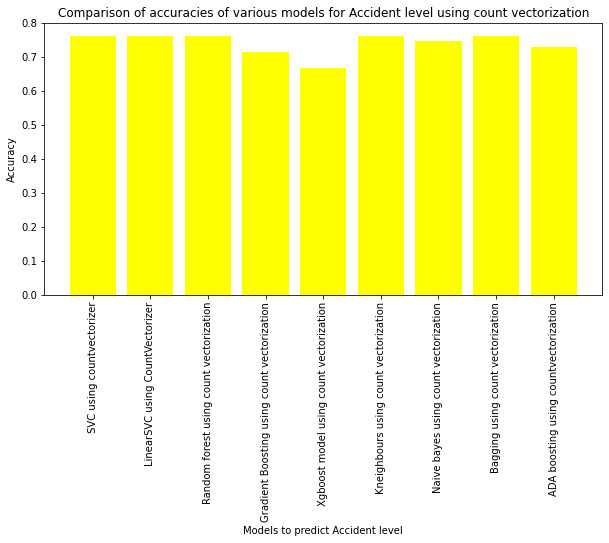

In [150]:
# creating the bar plot
fig = plt.figure(figsize = (10, 5)) 
plt.bar(models_list_accidentlevel, accuracy_accidentlevel, color ='yellow',width=0.8,) 
  
plt.xlabel("Models to predict Accident level") 
plt.xticks(rotation = 'vertical')
plt.ylabel("Accuracy") 
plt.title("Comparison of accuracies of various models for Accident level using count vectorization") 
plt.show() 

In [146]:
models_list_accidentlevel_tf = ["LinearSVC using TF-IDF","Random forest using TF-IDF","Gradient Boosting using TF-IDF","Xgboost model using TF-IDF","Kneighbours using TF-IDF","Naive bayes using TF-IDF", "Bagging using TF-IDF","ADA boosting using TF-IDF"]

accuracy_accidentlevel_tf = [acct_svctf,acct_rfc_tf,acct_gb_tf,acct_xgb_tf,acc_neigh2,g_model3.score(Xt_test, yt_test),acc_b3,acc_ada_t1
]
print(accuracy_accidentlevel_tf)

[0.7619047619047619, 0.7619047619047619, 0.6984126984126984, 0.7142857142857143, 0.746031746031746, 0.746031746031746, 0.746031746031746, 0.7142857142857143]


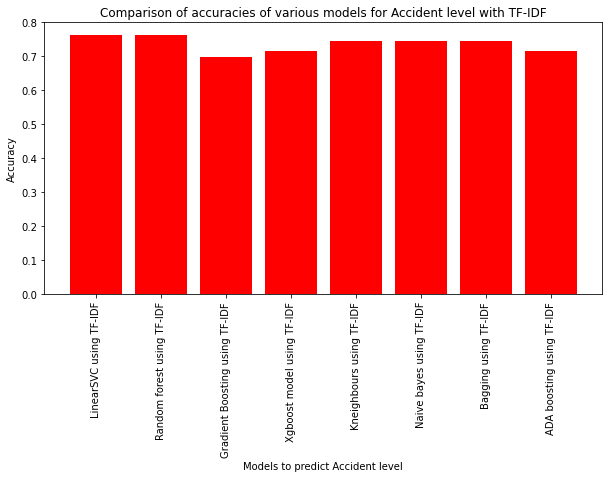

In [149]:
# creating the bar plot
fig = plt.figure(figsize = (10, 5)) 
plt.bar(models_list_accidentlevel_tf, accuracy_accidentlevel_tf, color ='red',width=0.8,) 
  
plt.xlabel("Models to predict Accident level") 
plt.xticks(rotation = 'vertical')
plt.ylabel("Accuracy") 
plt.title("Comparison of accuracies of various models for Accident level with TF-IDF") 
plt.show() 

In [152]:
#Comparing machine learning models with target variable as potential accidentlevel.
#comparing count vectorization models
models_list_potentialaccidentlevel = ["SVC using countvectorizer","LinearSVC using CountVectorizer","Random forest using count vectorization","Gradient Boosting using count vectorization","Xgboost model using count vectorization","Kneighbours using count vectorization","Naive bayes using count vectorization", "Bagging using count vectorization","ADA boosting using countvectorization"]

accuracy_paccidentlevel = [accuracy_score(yp_test, grid_predictions_p),accp_svc,accp_rfc,accp_gbc,accp_xgbc,acc_neigh1,g_model2.score(Xp_test, yp_test),acc_b1,acc_ada1]
print(accuracy_paccidentlevel)

[0.49206349206349204, 0.4444444444444444, 0.38095238095238093, 0.38095238095238093, 0.3968253968253968, 0.25396825396825395, 0.42857142857142855, 0.36507936507936506, 0.36507936507936506]


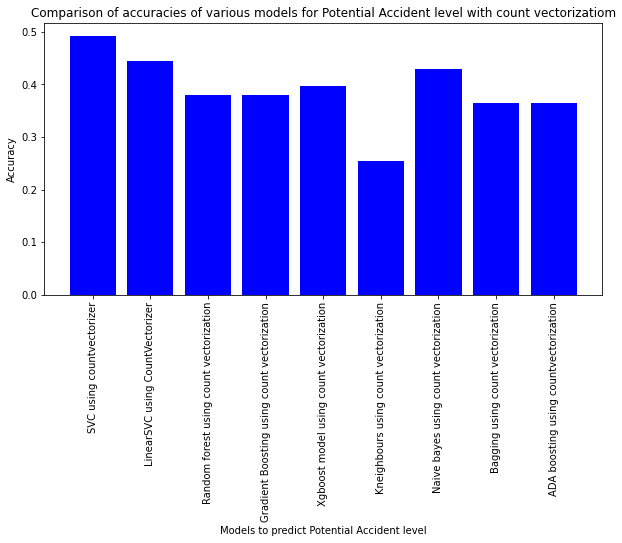

In [154]:
# creating the bar plot
fig = plt.figure(figsize = (10, 5)) 
plt.bar(models_list_potentialaccidentlevel, accuracy_paccidentlevel, color ='blue',width=0.8,) 
  
plt.xlabel("Models to predict Potential Accident level") 
plt.xticks(rotation = 'vertical')
plt.ylabel("Accuracy") 
plt.title("Comparison of accuracies of various models for Potential Accident level with count vectorizatiom") 
plt.show() 

In [155]:
#comparing machine learning models with TF-IDF for the target variable potential accident level.
models_list_paccidentlevel_tf = ["SVC using TF-IDF","Random forest using TF-IDF","Gradient Boosting using TF-IDF","Xgboost model using TF-IDF","Kneighbours using TF-IDF","Naive bayes using TF-IDF", "Bagging using TF-IDF","ADA boosting using TF-IDF"]

accuracy_paccidentlevel_tf = [accpa_svc,acc_pa_rf,acc_pa_gb,acc_pa_xgb,acc_pa_neigh1,g_model_pa.score(Xpa_test, ypa_test),acc_pa_b1,acc_pa_ada1]
print(accuracy_paccidentlevel_tf)

[0.42857142857142855, 0.4126984126984127, 0.42857142857142855, 0.4444444444444444, 0.3968253968253968, 0.4444444444444444, 0.4126984126984127, 0.2857142857142857]


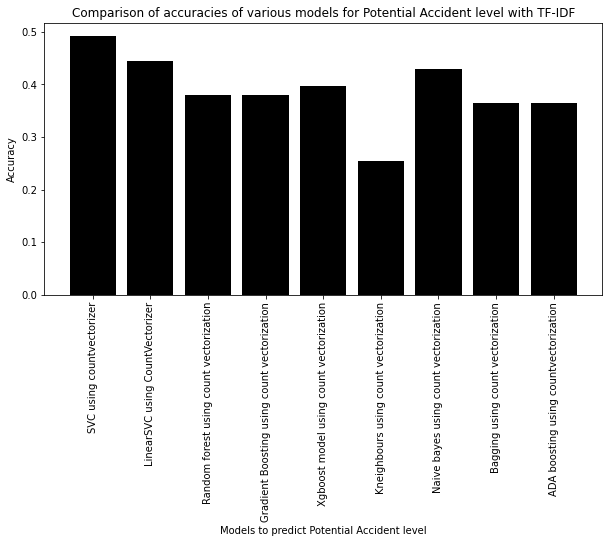

In [157]:
# creating the bar plot
fig = plt.figure(figsize = (10, 5)) 
plt.bar(models_list_potentialaccidentlevel, accuracy_paccidentlevel, color ='black',width=0.8,) 
  
plt.xlabel("Models to predict Potential Accident level") 
plt.xticks(rotation = 'vertical')
plt.ylabel("Accuracy") 
plt.title("Comparison of accuracies of various models for Potential Accident level with TF-IDF") 
plt.show()

In [158]:
#Step 3: Design, train and test Neural networks classifiers

In [159]:
df3=data1.copy()

In [160]:
df3.shape

(418, 16)

In [161]:
from sklearn.preprocessing import LabelEncoder
acident_level_encoder1 = LabelEncoder()
df3['Accident Level'] = acident_level_encoder1.fit_transform(df3['Accident Level'])

potentital_accident_level_encoder1 = LabelEncoder()
df3['Potential Accident Level'] = potentital_accident_level_encoder1.fit_transform(df3['Potential Accident Level'])

In [162]:
y_p=df3['Accident Level']

In [163]:
df3['Accident Level'].unique()

array([0, 3, 2, 1, 4])

In [164]:
df3

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Natureofemployee,Critical Risk,Description,Year,Month,Weekday,Season,processed_text,description_processed
0,2016-01-01,Country_01,1,Mining,0,3,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,Friday,Summer,"[while, removing, drill, rod, jumbo, maintenan...",while removing drill rod jumbo maintenance sup...
1,2016-01-02,Country_02,2,Mining,0,3,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,Saturday,Summer,"[during, activation, sodium, sulphide, pump, p...",during activation sodium sulphide pump piping ...
2,2016-01-06,Country_01,3,Mining,0,2,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,Wednesday,Summer,"[substation, milpo, located, level, collaborat...",substation milpo located level collaborator ex...
3,2016-01-08,Country_01,4,Mining,0,0,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,Friday,Summer,"[being, approximately, personnel, begin, task,...",being approximately personnel begin task unloc...
4,2016-01-10,Country_01,4,Mining,3,3,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,Sunday,Summer,"[approximately, am, circumstance, mechanic, an...",approximately am circumstance mechanic anthony...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2017-07-04,Country_01,4,Mining,0,2,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w...",2017,7,Tuesday,Winter,"[being, approximately, am, approximately, lift...",being approximately am approximately lifting k...
414,2017-07-04,Country_01,3,Mining,0,1,Female,Employee,Others,The collaborator moved from the infrastructure...,2017,7,Tuesday,Winter,"[the, collaborator, moved, infrastructure, off...",the collaborator moved infrastructure office j...
415,2017-07-05,Country_02,9,Metals,0,1,Male,Employee,Venomous Animals,During the environmental monitoring activity i...,2017,7,Wednesday,Winter,"[during, environmental, monitoring, activity, ...",during environmental monitoring activity area ...
416,2017-07-06,Country_02,5,Metals,0,1,Male,Employee,Cut,The Employee performed the activity of strippi...,2017,7,Thursday,Winter,"[the, employee, performed, activity, stripping...",the employee performed activity stripping cath...


In [165]:
x_p=df3['description_processed']


In [166]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(ngram_range=(1,2))
Xte = tfidf_vec.fit_transform(x_p).toarray()

In [167]:
#splitting training and testing data
from sklearn.model_selection import train_test_split
X_trainp, X_testp, y_trainp, y_testp = train_test_split(Xte, y_p, test_size=0.3, random_state=50)

In [168]:
random_seed = 2
X_testp, X_valp, y_testp, y_valp = train_test_split(X_testp,y_testp, test_size = 0.5, random_state=random_seed)

In [169]:
#shape of train and test
print("Shape of training and testing:",X_trainp.shape,X_testp.shape)

Shape of training and testing: (292, 13242) (63, 13242)


In [170]:
from tensorflow.python.keras.layers import Dense, Dropout, InputLayer, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.python.keras.layers import GlobalAveragePooling2D, Conv2D, MaxPool2D, GlobalMaxPool2D
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.utils import to_categorical  # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [171]:
def model_p():
    model7 = Sequential()
    
    model7.add(Dense(50, input_shape = (13242, ), kernel_initializer='he_normal'))
    model7.add(BatchNormalization())
    model7.add(Activation('relu'))
    model7.add(Dropout(0.2))
    model7.add(Dense(50, kernel_initializer='he_normal'))
    model7.add(BatchNormalization())
    model7.add(Activation('relu'))    
    model7.add(Dropout(0.2))
    model7.add(Dense(50, kernel_initializer='he_normal'))
    model7.add(BatchNormalization())
    model7.add(Activation('relu'))
    model7.add(Dropout(0.2))
    model7.add(Dense(50, kernel_initializer='he_normal'))
    model7.add(BatchNormalization())
    model7.add(Activation('relu'))
    model7.add(Dropout(0.2))
    model7.add(Dense(1, kernel_initializer='he_normal'))
    model7.add(Activation('softmax'))
    
    adam_7 = optimizers.Adam(lr = 0.001)
    model7.compile(optimizer = adam_7, loss = 'mse', metrics = ['accuracy'])
    
    return model7

In [172]:
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras import optimizers
model_u = model_p()
history_u = model_u.fit(X_trainp, y_trainp,validation_data=(X_testp,y_testp),epochs = 10, verbose = 1)

Epoch 1/10


D:\anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


10/10 [==============================] - 1s 24ms/step - loss: 1.3288 - accuracy: 0.0856 - val_loss: 1.1905 - val_accuracy: 0.0952
Epoch 2/10
10/10 [==============================] - 0s 9ms/step - loss: 1.3288 - accuracy: 0.0856 - val_loss: 1.1905 - val_accuracy: 0.0952
Epoch 3/10
10/10 [==============================] - 0s 10ms/step - loss: 1.3288 - accuracy: 0.0856 - val_loss: 1.1905 - val_accuracy: 0.0952
Epoch 4/10
10/10 [==============================] - 0s 9ms/step - loss: 1.3288 - accuracy: 0.0856 - val_loss: 1.1905 - val_accuracy: 0.0952
Epoch 5/10
10/10 [==============================] - 0s 9ms/step - loss: 1.3288 - accuracy: 0.0856 - val_loss: 1.1905 - val_accuracy: 0.0952
Epoch 6/10
10/10 [==============================] - 0s 8ms/step - loss: 1.3288 - accuracy: 0.0856 - val_loss: 1.1905 - val_accuracy: 0.0952
Epoch 7/10
10/10 [==============================] - 0s 9ms/step - loss: 1.3288 - accuracy: 0.0856 - val_loss: 1.1905 - val_accuracy: 0.0952
Epoch 8/10
10/10 [===========

In [174]:
#Evaluation of the model
results = model_u.evaluate(X_testp, y_testp)



2/2 [==============================] - 0s 0s/step - loss: 1.1905 - accuracy: 0.0952


In [173]:
ann_loss, ann_accuracy = model_u.evaluate(X_testp, y_testp, verbose=1)
print('Test loss:', ann_loss)
print('Test accuracy:', ann_accuracy)

2/2 [==============================] - 0s 0s/step - loss: 1.1905 - accuracy: 0.0952
Test loss: 1.1904761791229248
Test accuracy: 0.095238097012043


In [175]:
y_q=df3['Potential Accident Level']

In [176]:
x_q=df3['description_processed']

In [177]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec1 = TfidfVectorizer(ngram_range=(1,2))
Xtq = tfidf_vec1.fit_transform(x_q).toarray()

In [178]:
#splitting training and testing data
from sklearn.model_selection import train_test_split
X_trainq, X_testq, y_trainq, y_testq= train_test_split(Xtq, y_q, test_size=0.3, random_state=50)

In [179]:
random_seed = 2
X_testq, X_valq, y_testq, y_valq = train_test_split(X_testq,y_testq, test_size = 0.5, random_state=random_seed)

In [180]:
#shape of train and test
print("Shape of training and testing:",X_trainq.shape,X_testq.shape)

Shape of training and testing: (292, 13242) (63, 13242)


In [181]:
from tensorflow.python.keras.layers import Dense, Dropout, InputLayer, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.python.keras.layers import GlobalAveragePooling2D, Conv2D, MaxPool2D, GlobalMaxPool2D
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.utils import to_categorical  # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [182]:
def model_q():
    model8 = Sequential()
    
    model8.add(Dense(50, input_shape = (13242, ), kernel_initializer='he_normal'))
    model8.add(BatchNormalization())
    model8.add(Activation('relu'))
    model8.add(Dropout(0.2))
    model8.add(Dense(50, kernel_initializer='he_normal'))
    model8.add(BatchNormalization())
    model8.add(Activation('relu'))    
    model8.add(Dropout(0.2))
    model8.add(Dense(50, kernel_initializer='he_normal'))
    model8.add(BatchNormalization())
    model8.add(Activation('relu'))
    model8.add(Dropout(0.2))
    model8.add(Dense(50, kernel_initializer='he_normal'))
    model8.add(BatchNormalization())
    model8.add(Activation('relu'))
    model8.add(Dropout(0.2))
    model8.add(Dense(1, kernel_initializer='he_normal'))
    model8.add(Activation('softmax'))
    
    adam_8 = optimizers.Adam(lr = 0.001)
    model8.compile(optimizer = adam_8, loss = 'mse', metrics = ['accuracy'])
    
    return model8

In [183]:
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras import optimizers
model_w = model_q()
history_w = model_w.fit(X_trainp, y_trainp,validation_data=(X_testq,y_testq),epochs = 10, verbose = 1)

Epoch 1/10
10/10 [==============================] - 1s 24ms/step - loss: 1.3288 - accuracy: 0.0856 - val_loss: 2.5079 - val_accuracy: 0.2698
Epoch 2/10
10/10 [==============================] - 0s 9ms/step - loss: 1.3288 - accuracy: 0.0856 - val_loss: 2.5079 - val_accuracy: 0.2698
Epoch 3/10
10/10 [==============================] - 0s 10ms/step - loss: 1.3288 - accuracy: 0.0856 - val_loss: 2.5079 - val_accuracy: 0.2698
Epoch 4/10
10/10 [==============================] - 0s 12ms/step - loss: 1.3288 - accuracy: 0.0856 - val_loss: 2.5079 - val_accuracy: 0.2698
Epoch 5/10
10/10 [==============================] - 0s 12ms/step - loss: 1.3288 - accuracy: 0.0856 - val_loss: 2.5079 - val_accuracy: 0.2698
Epoch 6/10
10/10 [==============================] - 0s 12ms/step - loss: 1.3288 - accuracy: 0.0856 - val_loss: 2.5079 - val_accuracy: 0.2698
Epoch 7/10
10/10 [==============================] - 0s 13ms/step - loss: 1.3288 - accuracy: 0.0856 - val_loss: 2.5079 - val_accuracy: 0.2698
Epoch 8/10
10/

In [184]:
#Evaluation of the model
results_q = model_w.evaluate(X_testq, y_testq)



2/2 [==============================] - 0s 4ms/step - loss: 2.5079 - accuracy: 0.2698


In [185]:
ann_loss1, ann_accuracy1 = model_w.evaluate(X_testq, y_testq, verbose=1)
print('Test loss:', ann_loss1)
print('Test accuracy:', ann_accuracy1)

2/2 [==============================] - 0s 4ms/step - loss: 2.5079 - accuracy: 0.2698
Test loss: 2.507936477661133
Test accuracy: 0.2698412835597992


In [188]:
#Comparing accuracies for ANN with target variable accident level and potential accident level

In [187]:
models_tlist_accidentlevel_tf = ["ANN for accident level","ANN for potential accident level"]

accuracyt_accidentlevel_tf = [ann_accuracy,ann_accuracy1]
print(accuracyt_accidentlevel_tf)

[0.095238097012043, 0.2698412835597992]


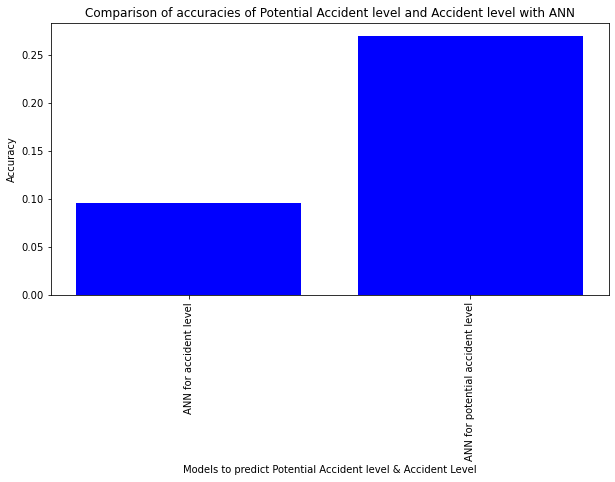

In [191]:
# creating the bar plot
fig = plt.figure(figsize = (10, 5)) 
plt.bar(models_tlist_accidentlevel_tf, accuracyt_accidentlevel_tf, color ='blue',width=0.8,) 
  
plt.xlabel("Models to predict Potential Accident level & Accident Level") 
plt.xticks(rotation = 'vertical')
plt.ylabel("Accuracy") 
plt.title("Comparison of accuracies of Potential Accident level and Accident level with ANN") 
plt.show()

In [194]:
#Comparing Loss of ANN with potential and accident level.
models1_tlist_accidentlevel_tf = ["ANN for accident level","ANN for potential accident level"]

losst1_accidentlevel_tf = [ann_loss,ann_loss1]
print(losst1_accidentlevel_tf)

[1.1904761791229248, 2.507936477661133]


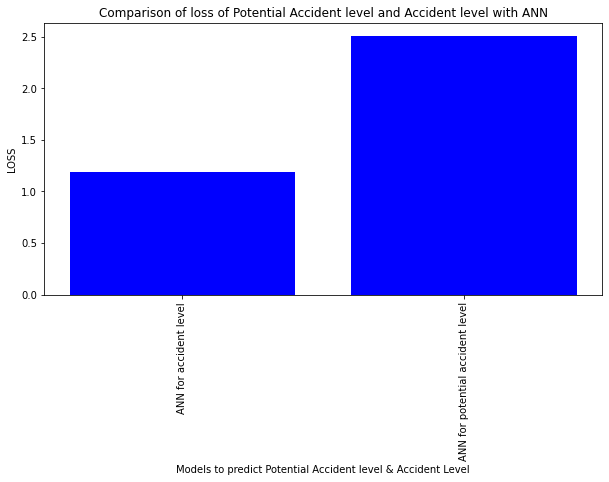

In [307]:
#Bar plot
fig = plt.figure(figsize = (10, 5)) 
plt.bar(models1_tlist_accidentlevel_tf, losst1_accidentlevel_tf, color ='blue',width=0.8,) 
  
plt.xlabel("Models to predict Potential Accident level & Accident Level") 
plt.xticks(rotation = 'vertical')
plt.ylabel("LOSS") 
plt.title("Comparison of loss of Potential Accident level and Accident level with ANN") 
plt.show()

In [196]:
#Step 4: Design, train and test RNN or LSTM classifiers

In [238]:
#  LSTM for target variable accident level

In [198]:
df1=data1.copy()

In [199]:
country_encoder = LabelEncoder()
df1['Country'] = country_encoder.fit_transform(df1['Country'])

local_encoder = LabelEncoder()
df1['Local'] = local_encoder.fit_transform(df1['Local'])

industry_sector_encoder = LabelEncoder()
df1['Industry Sector'] = industry_sector_encoder.fit_transform(df1['Industry Sector'])

gender_encoder = LabelEncoder()
df1['Gender'] = gender_encoder.fit_transform(df1['Gender'])

employee_encoder = LabelEncoder()
df1['Natureofemployee'] = employee_encoder.fit_transform(df1['Natureofemployee'])

risk_encoder = LabelEncoder()
df1['Critical Risk'] = risk_encoder.fit_transform(df1['Critical Risk'])

acident_level_encoder = LabelEncoder()
df1['Accident Level'] = acident_level_encoder.fit_transform(df1['Accident Level'])

potentital_accident_level_encoder = LabelEncoder()
df1['Potential Accident Level'] = potentital_accident_level_encoder.fit_transform(df1['Potential Accident Level'])

In [200]:
from tensorflow.keras.layers import TextVectorization

In [201]:
text_vectorizer = TextVectorization()

In [202]:
# Get the vocabulary from the text vectorization layer
import numpy as np

words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(2, ['', '[UNK]'])

In [203]:
df1.head(5) # after label ecoding

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Natureofemployee,Critical Risk,Description,Year,Month,Weekday,Season,processed_text,description_processed
0,2016-01-01,0,0,1,0,3,1,1,20,While removing the drill rod of the Jumbo 08 f...,2016,1,Friday,Summer,"[while, removing, drill, rod, jumbo, maintenan...",while removing drill rod jumbo maintenance sup...
1,2016-01-02,1,1,1,0,3,1,0,21,During the activation of a sodium sulphide pum...,2016,1,Saturday,Summer,"[during, activation, sodium, sulphide, pump, p...",during activation sodium sulphide pump piping ...
2,2016-01-06,0,2,1,0,2,1,2,15,In the sub-station MILPO located at level +170...,2016,1,Wednesday,Summer,"[substation, milpo, located, level, collaborat...",substation milpo located level collaborator ex...
3,2016-01-08,0,3,1,0,0,1,1,16,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,Friday,Summer,"[being, approximately, personnel, begin, task,...",being approximately personnel begin task unloc...
4,2016-01-10,0,3,1,3,3,1,1,16,Approximately at 11:45 a.m. in circumstances t...,2016,1,Sunday,Summer,"[approximately, am, circumstance, mechanic, an...",approximately am circumstance mechanic anthony...


In [204]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      418 non-null    object
 1   Country                   418 non-null    int32 
 2   Local                     418 non-null    int64 
 3   Industry Sector           418 non-null    int32 
 4   Accident Level            418 non-null    int32 
 5   Potential Accident Level  418 non-null    int32 
 6   Gender                    418 non-null    int32 
 7   Natureofemployee          418 non-null    int32 
 8   Critical Risk             418 non-null    int32 
 9   Description               418 non-null    object
 10  Year                      418 non-null    int64 
 11  Month                     418 non-null    int64 
 12  Weekday                   418 non-null    object
 13  Season                    418 non-null    object
 14  processed_text            

In [205]:
from keras.utils import np_utils
import numpy as np
X = data1['description_processed'].to_numpy()
uniques, ids = np.unique(df1['Accident Level'], return_inverse=True)

Y = np_utils.to_categorical(ids, len(uniques))

X.shape, Y.shape, ids.shape


((418,), (418, 5), (418,))

In [206]:
from sklearn.model_selection import train_test_split
num_classes = 5 

# Use train_test_split to split training data into training and validation sets
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.1, # dedicate 10% of samples to validation set
                                                    random_state=42) # random state for reproducibility



In [207]:
Y[0]

array([1., 0., 0., 0., 0.], dtype=float32)

In [208]:
X_train.shape, Y_train.shape

((376,), (376, 5))

In [209]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(X_train)

In [210]:
import tensorflow as tf

In [211]:
import random

# Choose a random sentence from the training dataset and tokenize it

random_sentence = random.choice(X_train)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])


Original text:
during torch cutting activity new evaporator treatment fixing rupture hose near torch pen causing injury      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  24,  957,  135,   10, 1875, 2194,  951, 1234, 1045,  102,  166,
         957, 1107,    5,   11]], dtype=int64)>

In [212]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

max_vocab_length = len(words_in_vocab)
max_length = round(max([len(i.split()) for i in X_train]))


Number of words in vocab: 2598
Top 5 most common words: ['', '[UNK]', 'the', 'hand', 'employee']
Bottom 5 least common words: ['absorbing', 'absorbent', 'abratech', 'abdomen', 'abb']


In [213]:
max_length

95

In [214]:
import tensorflow as tf
from tensorflow.keras import layers
tf.random.set_seed(42)

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1") 

embedding

In [215]:
# Get a random sentence from training set
random_sentence = random.choice(X_train)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed


Original text:
when cutting vegetation open bite using sickle assistant struck vine twice when liana ruptured top branch projected face auxiliary causing cut upper lip      

Embedded version:


<tf.Tensor: shape=(1, 23, 128), dtype=float32, numpy=
array([[[-0.03624376,  0.04096097,  0.00048   , ..., -0.0216538 ,
          0.00666716,  0.01672911],
        [-0.00767387,  0.03244089, -0.00273246, ...,  0.0495437 ,
         -0.02859933, -0.03865745],
        [ 0.03118776, -0.04945146,  0.00428406, ..., -0.01781521,
          0.03616799, -0.00525054],
        ...,
        [-0.01617707,  0.0422763 ,  0.00466955, ...,  0.0381538 ,
          0.03315575,  0.04610637],
        [-0.0357952 , -0.03596241,  0.0240985 , ..., -0.03533927,
         -0.00157645,  0.01281765],
        [ 0.04466719, -0.04735221,  0.02906582, ...,  0.01456075,
         -0.03965676,  0.0335649 ]]], dtype=float32)>

In [216]:
# Create tensorboard callback (need to create a new one for each model)

def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [217]:
# Build model with the Functional API

inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs = layers.Dense(num_classes, activation="softmax")(x) # create the output layer, want binary outputs so use softmax activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model



In [218]:
# Compile model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])



In [219]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, None, 128)         332544    
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_10 (Dense)            (None, 5)                 645       
                                                                 
Total params: 333,189
Trainable params: 333,189
Non-t

In [220]:
from keras.callbacks import EarlyStopping
import datetime

batch_size = 32
custom_early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min',
    restore_best_weights=True
)

# Fit the model
model_1_history = model_1.fit(X_train, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              Y_train,
                              epochs=20,
                              validation_data=(X_test, Y_test),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, experiment_name="simple_dense_model"), custom_early_stopping])

Saving TensorBoard log files to: model_logs/simple_dense_model/20220507-104808
Epoch 1/20
12/12 [==============================] - 1s 23ms/step - loss: 1.5516 - accuracy: 0.7261 - val_loss: 1.4870 - val_accuracy: 0.7619
Epoch 2/20
12/12 [==============================] - 0s 11ms/step - loss: 1.4385 - accuracy: 0.7367 - val_loss: 1.3715 - val_accuracy: 0.7619
Epoch 3/20
12/12 [==============================] - 0s 11ms/step - loss: 1.3187 - accuracy: 0.7367 - val_loss: 1.2500 - val_accuracy: 0.7619
Epoch 4/20
12/12 [==============================] - 0s 15ms/step - loss: 1.1954 - accuracy: 0.7367 - val_loss: 1.1227 - val_accuracy: 0.7619
Epoch 5/20
12/12 [==============================] - 0s 14ms/step - loss: 1.0720 - accuracy: 0.7367 - val_loss: 1.0139 - val_accuracy: 0.7619
Epoch 6/20
12/12 [==============================] - 0s 11ms/step - loss: 0.9744 - accuracy: 0.7367 - val_loss: 0.9267 - val_accuracy: 0.7619
Epoch 7/20
12/12 [==============================] - 0s 12ms/step - loss: 0.

In [221]:
model_1.evaluate(X_test, Y_test)


2/2 [==============================] - 0s 4ms/step - loss: 0.8167 - accuracy: 0.7619


[0.8166996836662292, 0.761904776096344]

In [222]:
#Accuracy and loss of model_1
model1_loss, model1_accuracy = model_1.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', model1_loss)
print('Test accuracy:', model1_accuracy)

2/2 [==============================] - 0s 3ms/step - loss: 0.8167 - accuracy: 0.7619
Test loss: 0.8166996836662292
Test accuracy: 0.761904776096344


In [223]:
from sklearn.metrics import confusion_matrix, classification_report

In [224]:
Y_pred = model_1.predict(X_test)
Y_test_decoded = uniques[np.argmax(Y_test, 1)]
Y_pred_decoded = uniques[np.argmax(Y_pred, 1)]

# Classification Report
cr = classification_report(Y_test_decoded, Y_pred_decoded)
print("Classification Report:- ")
print(cr)

Classification Report:- 
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        32
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         1

    accuracy                           0.76        42
   macro avg       0.15      0.20      0.17        42
weighted avg       0.58      0.76      0.66        42



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [225]:
#LSTM

In [226]:

lstm_out = 128

model_2 = Sequential()
model_2.add(layers.Input(shape=(1,), dtype="string"))
model_2.add(text_vectorizer)
model_2.add(layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2"))
model_2.add(layers.LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2,return_sequences=True))
model_2.add(layers.LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model_2.add(layers.Dense(num_classes, activation="softmax")) # create the output layer, want binary outputs so use softmax activation
print(model_2.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding_2 (Embedding)     (None, None, 128)         332544    
                                                                 
 lstm (LSTM)                 (None, None, 128)         131584    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_11 (Dense)            (None, 5)                 645       
                                                                 
Total params: 596,357
Trainable params: 596,357
Non-trainable params: 0
________________________________________________

In [227]:
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [228]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding_2 (Embedding)     (None, None, 128)         332544    
                                                                 
 lstm (LSTM)                 (None, None, 128)         131584    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_11 (Dense)            (None, 5)                 645       
                                                                 
Total params: 596,357
Trainable params: 596,357
Non-trainable params: 0
________________________________________________

In [229]:
#Running the model

In [230]:
batch_size = 32
custom_early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min',
    restore_best_weights=True
)

# Fit model
model_2_history = model_2.fit(X_train,
                              Y_train,
                              epochs=50,
                              validation_data=(X_test, Y_test),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,"LSTM"), custom_early_stopping])



Saving TensorBoard log files to: model_logs/LSTM/20220507-105237
Epoch 1/50
12/12 [==============================] - 6s 218ms/step - loss: 1.1610 - accuracy: 0.6809 - val_loss: 0.8939 - val_accuracy: 0.7619
Epoch 2/50
12/12 [==============================] - 2s 168ms/step - loss: 0.9246 - accuracy: 0.7367 - val_loss: 0.8631 - val_accuracy: 0.7619
Epoch 3/50
12/12 [==============================] - 2s 173ms/step - loss: 0.9101 - accuracy: 0.7367 - val_loss: 0.8656 - val_accuracy: 0.7619
Epoch 4/50
12/12 [==============================] - 2s 175ms/step - loss: 0.9042 - accuracy: 0.7367 - val_loss: 0.8287 - val_accuracy: 0.7619
Epoch 5/50
12/12 [==============================] - 2s 181ms/step - loss: 0.9027 - accuracy: 0.7394 - val_loss: 0.8167 - val_accuracy: 0.7619
Epoch 6/50
12/12 [==============================] - 2s 173ms/step - loss: 0.8508 - accuracy: 0.7367 - val_loss: 0.8203 - val_accuracy: 0.7619
Epoch 7/50
12/12 [==============================] - 2s 193ms/step - loss: 0.7692 - 

In [231]:
#Evaluating the model_2

In [232]:
model_2.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 16ms/step - loss: 0.8167 - accuracy: 0.7619


[0.8166620135307312, 0.761904776096344]

In [233]:
#Accuracy and loss of model_2
model2_loss, model2_accuracy = model_2.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', model2_loss)
print('Test accuracy:', model2_accuracy)

2/2 [==============================] - 0s 14ms/step - loss: 0.8167 - accuracy: 0.7619
Test loss: 0.8166620135307312
Test accuracy: 0.761904776096344


In [234]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [235]:
Y_pred = model_2.predict(X_test)
Y_test_decoded = uniques[np.argmax(Y_test, 1)]
Y_pred_decoded = uniques[np.argmax(Y_pred, 1)]

# Classification Report
cr = classification_report(Y_test_decoded, Y_pred_decoded)
print("Classification Report:- ")
print(cr)

Classification Report:- 
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        32
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         1

    accuracy                           0.76        42
   macro avg       0.16      0.20      0.18        42
weighted avg       0.59      0.76      0.67        42



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [236]:
#TUNING the model_2
#Changing the batch size and epochs
batch_size = 16
custom_early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min',
    restore_best_weights=True
)

# Fit model
modelt_2_history = model_2.fit(X_train,
                              Y_train,
                              epochs=50,
                              validation_data=(X_test, Y_test),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,"LSTM"), custom_early_stopping])


Saving TensorBoard log files to: model_logs/LSTM/20220507-105459
Epoch 1/50
12/12 [==============================] - 3s 201ms/step - loss: 0.8693 - accuracy: 0.7420 - val_loss: 0.7905 - val_accuracy: 0.7857
Epoch 2/50
12/12 [==============================] - 2s 177ms/step - loss: 0.8565 - accuracy: 0.7500 - val_loss: 0.7911 - val_accuracy: 0.7857
Epoch 3/50
12/12 [==============================] - 2s 182ms/step - loss: 0.8102 - accuracy: 0.7553 - val_loss: 0.7483 - val_accuracy: 0.7619
Epoch 4/50
12/12 [==============================] - 2s 190ms/step - loss: 0.7535 - accuracy: 0.7553 - val_loss: 0.9219 - val_accuracy: 0.6667
Epoch 5/50
12/12 [==============================] - 2s 184ms/step - loss: 0.7875 - accuracy: 0.7287 - val_loss: 0.9045 - val_accuracy: 0.7619
Epoch 6/50
12/12 [==============================] - 2s 191ms/step - loss: 0.8273 - accuracy: 0.7234 - val_loss: 0.9535 - val_accuracy: 0.6667
Epoch 7/50
12/12 [==============================] - 2s 211ms/step - loss: 0.7630 - 

In [237]:
model_2.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 14ms/step - loss: 0.7483 - accuracy: 0.7619


[0.748318076133728, 0.761904776096344]

It can be noted that the accuarcy of the model before and after tuning is the same.

In [239]:
#bidirectional lstm for target variable accident level

In [240]:
from keras.layers import LSTM
from keras.layers import Bidirectional
from tensorflow.python.keras.layers import GlobalMaxPool1D

lstm_out = 128

model_3 = Sequential()
model_3.add(layers.Input(shape=(1,), dtype="string"))
model_3.add(text_vectorizer)
model_3.add(layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2"))
model_3.add(Bidirectional(LSTM(lstm_out, return_sequences = True)))
model_3.add(GlobalMaxPool1D())
model_3.add(Dropout(0.5, input_shape = (256,)))
model_3.add(Dense(128, activation = 'relu'))
model_3.add(Dropout(0.5, input_shape = (128,)))
model_3.add(Dense(64, activation = 'relu'))
model_3.add(Dropout(0.5, input_shape = (64,)))
model_3.add(layers.Dense(num_classes, activation="softmax")) # create the output layer, want binary outputs so use softmax activation
print(model_3.summary())



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding_2 (Embedding)     (None, None, 128)         332544    
                                                                 
 bidirectional (Bidirectiona  (None, None, 256)        263168    
 l)                                                              
                                                                 
 module_wrapper (ModuleWrapp  (None, 256)              0         
 er)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                      

In [241]:
# Compile model
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [242]:
batch_size = 32
custom_early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min',
    restore_best_weights=True
)

# Fit model
model_3_history = model_3.fit(X_train,
                              Y_train,
                              epochs=50,
                              validation_data=(X_test, Y_test),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,"BI-LSTM"), custom_early_stopping])

Saving TensorBoard log files to: model_logs/BI-LSTM/20220507-105755
Layer ModuleWrapper has arguments ['self', 'module', 'method_name']
in `__init__` and therefore must override `get_config()`.

Example:

class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2):
        super().__init__()
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config
Epoch 1/50
12/12 [==============================] - 5s 192ms/step - loss: 1.4655 - accuracy: 0.5559 - val_loss: 0.9183 - val_accuracy: 0.7619
Epoch 2/50
12/12 [==============================] - 1s 94ms/step - loss: 1.0669 - accuracy: 0.7340 - val_loss: 0.8605 - val_accuracy: 0.7619
Epoch 3/50
12/12 [==============================] - 1s 96ms/step - loss: 0.9919 - accuracy: 0.7314 - val_loss: 0.8918 - val_accuracy: 0.7619
Epoch 4/50
12/12 [=================

In [243]:
model_3.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 10ms/step - loss: 0.8605 - accuracy: 0.7619


[0.8605166673660278, 0.761904776096344]

In [267]:
#Accuracy and loss of model_3
model3_loss, model3_accuracy = model_3.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', model3_loss)
print('Test accuracy:', model3_accuracy)

2/2 [==============================] - 0s 8ms/step - loss: 0.8605 - accuracy: 0.7619
Test loss: 0.8605166673660278
Test accuracy: 0.761904776096344


In [244]:
Y_pred = model_3.predict(X_test)
Y_test_decoded = uniques[np.argmax(Y_test, 1)]
Y_pred_decoded = uniques[np.argmax(Y_pred, 1)]

# Classification Report
cr = classification_report(Y_test_decoded, Y_pred_decoded)
print("Classification Report:- ")
print(cr)

Classification Report:- 
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        32
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         1

    accuracy                           0.76        42
   macro avg       0.15      0.20      0.17        42
weighted avg       0.58      0.76      0.66        42



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [245]:
def Get_Predicted_class(description, model):
    print(description)
    y_pred = model_3.predict([ description ])
    print(y_pred)
    return acident_level_encoder.inverse_transform([uniques[np.argmax(y_pred)]])

In [246]:
index = 90
Get_Predicted_class(df1['Description'][index], model_2), acident_level_encoder.inverse_transform([df1['Accident Level'][index]])

Being 2:40 am. Approximately, Luna - master loader of the company Incimet was carrying out the loading activity of the front in the Cruiser 771 of the 1970 level; in moments that was tying the pentacord of the crown and trying to reach the fanel on the left side, loses balance by a movement of the ladder and falls to the floor resulting in the accident.
[[0.4377758  0.16007334 0.13246438 0.14220314 0.12748334]]


(array(['I'], dtype=object), array(['I'], dtype=object))

In [248]:
!tensorboard dev upload --logdir ./model_logs \
   --name " Accident data NLP model comparison" \
   --description " Accident data NLP model comparison" \
   --one_shot

^C


In [249]:
#LSTM with target variable potential accident level

In [250]:
from keras.utils import np_utils
X1 = data1['description_processed'].to_numpy()
uniques1, ids1 = np.unique(df1['Potential Accident Level'], return_inverse=True)

Y1 = np_utils.to_categorical(ids1, len(uniques1))

X1.shape, Y1.shape, ids1.shape

((418,), (418, 6), (418,))

In [251]:
from sklearn.model_selection import train_test_split
num_classes1 = 6

# Use train_test_split to split training data into training and validation sets
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,
                                                    Y1,
                                                    test_size=0.1, # dedicate 10% of samples to validation set
                                                    random_state=42) # random state for reproducibility

In [252]:
Y1[0]

array([0., 0., 0., 1., 0., 0.], dtype=float32)

In [253]:
X1_train.shape, Y1_train.shape

((376,), (376, 6))

In [254]:
from tensorflow.keras.layers import TextVectorization

In [255]:
text_vectorizer1 = TextVectorization()

In [256]:
# Fit the text vectorizer to the training text
text_vectorizer1.adapt(X1_train)

In [257]:
import random

# Choose a random sentence from the training dataset and tokenize it

random_sentence1 = random.choice(X1_train)
print(f"Original text:\n{random_sentence1}\
      \n\nVectorized version:")
text_vectorizer1([random_sentence1])


Original text:
the technician magnetometric survey stepped thorn his reaction immediately retreat losing balance magnetometer antenna broke      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   2,   98,  816,  608,  291,  605, 1210,  139,  109, 1703, 1166,
         242, 1935, 2534, 1325]], dtype=int64)>

In [258]:
# Get the unique words in the vocabulary
words_in_vocab1 = text_vectorizer1.get_vocabulary()
top_5_words1 = words_in_vocab1[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words1 = words_in_vocab1[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab1)}")
print(f"Top 5 most common words: {top_5_words1}") 
print(f"Bottom 5 least common words: {bottom_5_words1}")

max_vocab_length1 = len(words_in_vocab1)
max_length1 = round(max([len(i.split()) for i in X1_train]))

Number of words in vocab: 2598
Top 5 most common words: ['', '[UNK]', 'the', 'hand', 'employee']
Bottom 5 least common words: ['absorbing', 'absorbent', 'abratech', 'abdomen', 'abb']


In [259]:
# Build model with the Functional API

inputs1 = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x1 = text_vectorizer1(inputs1) # turn the input text into numbers
x1 = embedding(x1) # create an embedding of the numerized numbers
x1 = layers.GlobalAveragePooling1D()(x1) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs1 = layers.Dense(num_classes1, activation="softmax")(x1) # create the output layer, want binary outputs so use softmax activation
modelp_1 = tf.keras.Model(inputs1, outputs1, name="modelp_1_dense") # construct the model



In [260]:
# Compile model
modelp_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])



In [261]:
modelp_1.summary()

Model: "modelp_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, None, 128)         332544    
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_15 (Dense)            (None, 6)                 774       
                                                                 
Total params: 333,318
Trainable params: 333,318
Non-

In [262]:
from keras.callbacks import EarlyStopping
import datetime

batch_size1 = 32
custom_early_stopping1 = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min',
    restore_best_weights=True
)

# Fit the model
modelp_1_history = modelp_1.fit(X1_train, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              Y1_train,
                              epochs=20,
                              validation_data=(X1_test, Y1_test),
                              callbacks=[custom_early_stopping1])

Epoch 1/20
12/12 [==============================] - 0s 17ms/step - loss: 1.7828 - accuracy: 0.2261 - val_loss: 1.7363 - val_accuracy: 0.3095
Epoch 2/20
12/12 [==============================] - 0s 9ms/step - loss: 1.6946 - accuracy: 0.4282 - val_loss: 1.6629 - val_accuracy: 0.4524
Epoch 3/20
12/12 [==============================] - 0s 8ms/step - loss: 1.6261 - accuracy: 0.4016 - val_loss: 1.6068 - val_accuracy: 0.3810
Epoch 4/20
12/12 [==============================] - 0s 9ms/step - loss: 1.5726 - accuracy: 0.3484 - val_loss: 1.5625 - val_accuracy: 0.3810
Epoch 5/20
12/12 [==============================] - 0s 8ms/step - loss: 1.5324 - accuracy: 0.3457 - val_loss: 1.5285 - val_accuracy: 0.3810
Epoch 6/20
12/12 [==============================] - 0s 9ms/step - loss: 1.4980 - accuracy: 0.3457 - val_loss: 1.5016 - val_accuracy: 0.3810
Epoch 7/20
12/12 [==============================] - 0s 9ms/step - loss: 1.4696 - accuracy: 0.3617 - val_loss: 1.4801 - val_accuracy: 0.3810
Epoch 8/20
12/12 [=

In [265]:
#Evaluating the model

In [263]:
modelp_1.evaluate(X1_test, Y1_test)


2/2 [==============================] - 0s 0s/step - loss: 1.3468 - accuracy: 0.4524


[1.346811056137085, 0.4523809552192688]

In [268]:
#Finding the loss of the modelp_1
#Accuracy and loss of model_2
modelp_1_loss, modelp_1_accuracy = modelp_1.evaluate(X1_test, Y1_test, verbose=1)
print('Test loss:', modelp_1_loss)
print('Test accuracy:', modelp_1_accuracy)

2/2 [==============================] - 0s 5ms/step - loss: 1.3468 - accuracy: 0.4524
Test loss: 1.346811056137085
Test accuracy: 0.4523809552192688


In [269]:
#LSTM

In [270]:
lstm_out1 = 128

modelp_2 = Sequential()
modelp_2.add(layers.Input(shape=(1,), dtype="string"))
modelp_2.add(text_vectorizer1)
modelp_2.add(layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_p1"))
modelp_2.add(layers.LSTM(lstm_out1, dropout=0.2, recurrent_dropout=0.2,return_sequences=True))
modelp_2.add(layers.LSTM(lstm_out1, dropout=0.2, recurrent_dropout=0.2))
modelp_2.add(layers.Dense(num_classes1, activation="softmax")) # create the output layer, want binary outputs so use softmax activation
print(modelp_2.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding_p1 (Embedding)    (None, None, 128)         332544    
                                                                 
 lstm_3 (LSTM)               (None, None, 128)         131584    
                                                                 
 lstm_4 (LSTM)               (None, 128)               131584    
                                                                 
 dense_16 (Dense)            (None, 6)                 774       
                                                                 
Total params: 596,486
Trainable params: 596,486
Non-trainable params: 0
________________________________________________

In [271]:
modelp_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [272]:
#fitting the model

In [273]:
batch_size2 = 32
custom_early_stopping2 = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min',
    restore_best_weights=True
)

# Fit model
modelp_2_history = modelp_2.fit(X1_train,
                              Y1_train,
                              epochs=50,
                              validation_data=(X1_test, Y1_test),
                              callbacks=[custom_early_stopping2])



Epoch 1/50
12/12 [==============================] - 6s 212ms/step - loss: 1.6333 - accuracy: 0.3005 - val_loss: 1.5485 - val_accuracy: 0.1905
Epoch 2/50
12/12 [==============================] - 3s 202ms/step - loss: 1.5309 - accuracy: 0.2979 - val_loss: 1.4468 - val_accuracy: 0.3810
Epoch 3/50
12/12 [==============================] - 2s 167ms/step - loss: 1.5016 - accuracy: 0.3378 - val_loss: 1.4665 - val_accuracy: 0.2381
Epoch 4/50
12/12 [==============================] - 2s 164ms/step - loss: 1.4875 - accuracy: 0.3245 - val_loss: 1.4359 - val_accuracy: 0.3810
Epoch 5/50
12/12 [==============================] - 2s 160ms/step - loss: 1.4783 - accuracy: 0.3324 - val_loss: 1.4479 - val_accuracy: 0.3810
Epoch 6/50
12/12 [==============================] - 2s 188ms/step - loss: 1.4758 - accuracy: 0.2952 - val_loss: 1.4746 - val_accuracy: 0.3810
Epoch 7/50
12/12 [==============================] - 2s 192ms/step - loss: 1.5102 - accuracy: 0.3378 - val_loss: 1.4460 - val_accuracy: 0.3095
Epoch 

In [274]:
#Evaluating the moddel

In [275]:
modelp_2.evaluate(X1_test, Y1_test)


2/2 [==============================] - 0s 14ms/step - loss: 1.4359 - accuracy: 0.3810


[1.4359499216079712, 0.380952388048172]

In [277]:

#Accuracy and loss of modelp_2
modelp_2_loss, modelp_2_accuracy = modelp_2.evaluate(X1_test, Y1_test, verbose=1)
print('Test loss:', modelp_2_loss)
print('Test accuracy:', modelp_2_accuracy)

2/2 [==============================] - 0s 9ms/step - loss: 1.4359 - accuracy: 0.3810
Test loss: 1.4359499216079712
Test accuracy: 0.380952388048172


In [278]:
#Tuning the model

In [279]:
batch_size3 = 32
custom_early_stopping3 = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min',
    restore_best_weights=True
)

# Fit model
modelpt_2_history = modelp_2.fit(X1_train,
                              Y1_train,
                              epochs=100,
                              validation_data=(X1_test, Y1_test),
                              callbacks=[custom_early_stopping3])



Epoch 1/100
12/12 [==============================] - 2s 187ms/step - loss: 1.4856 - accuracy: 0.3324 - val_loss: 1.4481 - val_accuracy: 0.3810
Epoch 2/100
12/12 [==============================] - 2s 185ms/step - loss: 1.4802 - accuracy: 0.3324 - val_loss: 1.4429 - val_accuracy: 0.3810
Epoch 3/100
12/12 [==============================] - 2s 193ms/step - loss: 1.4800 - accuracy: 0.3351 - val_loss: 1.4436 - val_accuracy: 0.3810
Epoch 4/100
12/12 [==============================] - 2s 164ms/step - loss: 1.4749 - accuracy: 0.3351 - val_loss: 1.4370 - val_accuracy: 0.3810
Epoch 5/100
12/12 [==============================] - 2s 201ms/step - loss: 1.4691 - accuracy: 0.3378 - val_loss: 1.4398 - val_accuracy: 0.3810
Epoch 6/100
12/12 [==============================] - 2s 179ms/step - loss: 1.4842 - accuracy: 0.2899 - val_loss: 1.4422 - val_accuracy: 0.3810
Epoch 7/100
12/12 [==============================] - 2s 180ms/step - loss: 1.4635 - accuracy: 0.3378 - val_loss: 1.4410 - val_accuracy: 0.3810

In [280]:
#Evaluating the model

In [281]:
modelp_2.evaluate(X1_test, Y1_test)


2/2 [==============================] - 0s 10ms/step - loss: 1.3832 - accuracy: 0.4048


[1.3831945657730103, 0.4047619104385376]

In [282]:
#Accuracy and loss of model_2
model2t_loss, model2t_accuracy = modelp_2.evaluate(X1_test, Y1_test, verbose=1)
print('Test loss:', model2t_loss)
print('Test accuracy:', model2t_accuracy)

2/2 [==============================] - 0s 8ms/step - loss: 1.3832 - accuracy: 0.4048
Test loss: 1.3831945657730103
Test accuracy: 0.4047619104385376


In [283]:
#Bidirectional for target variable potential accident level

In [284]:
from keras.layers import LSTM
from keras.layers import Bidirectional
from tensorflow.python.keras.layers import GlobalMaxPool1D

lstm_outp = 128

modelp_3 = Sequential()
modelp_3.add(layers.Input(shape=(1,), dtype="string"))
modelp_3.add(text_vectorizer1)
modelp_3.add(layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2p1"))
modelp_3.add(Bidirectional(LSTM(lstm_outp, return_sequences = True)))
modelp_3.add(GlobalMaxPool1D())
modelp_3.add(Dropout(0.5, input_shape = (256,)))
modelp_3.add(Dense(128, activation = 'relu'))
modelp_3.add(Dropout(0.5, input_shape = (128,)))
modelp_3.add(Dense(64, activation = 'relu'))
modelp_3.add(Dropout(0.5, input_shape = (64,)))
modelp_3.add(layers.Dense(num_classes1, activation="softmax")) # create the output layer, want binary outputs so use softmax activation
print(modelp_3.summary())


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding_2p1 (Embedding)   (None, None, 128)         332544    
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 256)        263168    
 nal)                                                            
                                                                 
 module_wrapper_1 (ModuleWra  (None, 256)              0         
 pper)                                                           
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                      

In [285]:
# Compile model
modelp_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [286]:
#Fitting the model

In [287]:
batch_sizep2 = 32
custom_early_stoppingp2 = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min',
    restore_best_weights=True
)

# Fit model
modelp_3_history = modelp_3.fit(X1_train,
                              Y1_train,
                              epochs=50,
                              validation_data=(X1_test, Y1_test),
                              callbacks=[custom_early_stoppingp2])

Epoch 1/50
12/12 [==============================] - 4s 184ms/step - loss: 1.7673 - accuracy: 0.2394 - val_loss: 1.6848 - val_accuracy: 0.3810
Epoch 2/50
12/12 [==============================] - 1s 85ms/step - loss: 1.6574 - accuracy: 0.3005 - val_loss: 1.5450 - val_accuracy: 0.3810
Epoch 3/50
12/12 [==============================] - 1s 85ms/step - loss: 1.6265 - accuracy: 0.3112 - val_loss: 1.5455 - val_accuracy: 0.3810
Epoch 4/50
12/12 [==============================] - 1s 93ms/step - loss: 1.5644 - accuracy: 0.3059 - val_loss: 1.4715 - val_accuracy: 0.3810
Epoch 5/50
12/12 [==============================] - 1s 92ms/step - loss: 1.5852 - accuracy: 0.2872 - val_loss: 1.5225 - val_accuracy: 0.3810
Epoch 6/50
12/12 [==============================] - 1s 91ms/step - loss: 1.5574 - accuracy: 0.3032 - val_loss: 1.4758 - val_accuracy: 0.3810
Epoch 7/50
12/12 [==============================] - 1s 87ms/step - loss: 1.5301 - accuracy: 0.3138 - val_loss: 1.4341 - val_accuracy: 0.3810
Epoch 8/50
1

In [288]:
#Evaluating the modelp_3

In [289]:
modelp_3.evaluate(X1_test, Y1_test)

2/2 [==============================] - 0s 10ms/step - loss: 1.4341 - accuracy: 0.3810


[1.4341294765472412, 0.380952388048172]

In [290]:
#Accuracy and loss of model_2
modelp_3_loss, modelp_3_accuracy = modelp_3.evaluate(X1_test, Y1_test, verbose=1)
print('Test loss:', modelp_3_loss)
print('Test accuracy:', modelp_3_accuracy)

2/2 [==============================] - 0s 8ms/step - loss: 1.4341 - accuracy: 0.3810
Test loss: 1.4341294765472412
Test accuracy: 0.380952388048172


In [295]:
#Comparing all the BILSTM and LSTM models with target variable accident level
model_LSTM_accidentlevel_tf = ["LSTM for accident level","BILSTM for accident level"]

loss_LSTM_accidentlevel_tf = [model2_loss,model3_loss]
print(loss_LSTM_accidentlevel_tf)

[0.8166620135307312, 0.8605166673660278]


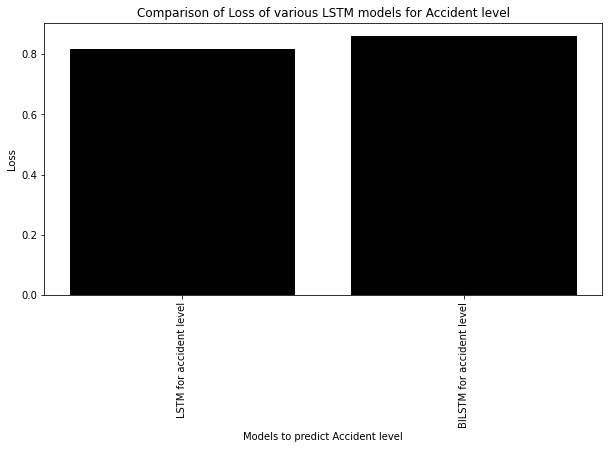

In [301]:
# creating the bar plot
fig = plt.figure(figsize = (10, 5)) 
plt.bar(model_LSTM_accidentlevel_tf,loss_LSTM_accidentlevel_tf, color ='black',width=0.8,) 
  
plt.xlabel("Models to predict Accident level") 
plt.xticks(rotation = 'vertical')
plt.ylabel("Loss") 
plt.title("Comparison of Loss of various LSTM models for Accident level") 
plt.show()

In [302]:
#Comparing accuracy
model_LSTM_a_accidentlevel_tf = ["LSTM for accident level","BILSTM for accident level"]

accuracy_LSTM_accidentlevel_tf = [model2_accuracy,model3_accuracy]
print(accuracy_LSTM_accidentlevel_tf)

[0.761904776096344, 0.761904776096344]


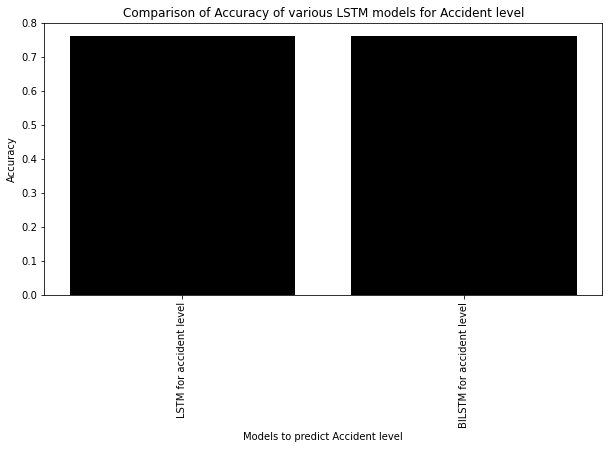

In [303]:
# creating the bar plot
fig = plt.figure(figsize = (10, 5)) 
plt.bar(model_LSTM_a_accidentlevel_tf,accuracy_LSTM_accidentlevel_tf, color ='black',width=0.8,) 
  
plt.xlabel("Models to predict Accident level") 
plt.xticks(rotation = 'vertical')
plt.ylabel("Accuracy") 
plt.title("Comparison of Accuracy of various LSTM models for Accident level") 
plt.show()

In [297]:
#Comparing the accuracies and loss for BILSTM and LSTM for potential accident level
model_LSTM_paccidentlevel_tf = ["LSTM for potential accident level","BILSTM for potential accident level"]

loss_LSTM_paccidentlevel_tf = [model2t_loss,modelp_3_loss]
print(loss_LSTM_paccidentlevel_tf)

[1.3831945657730103, 1.4341294765472412]


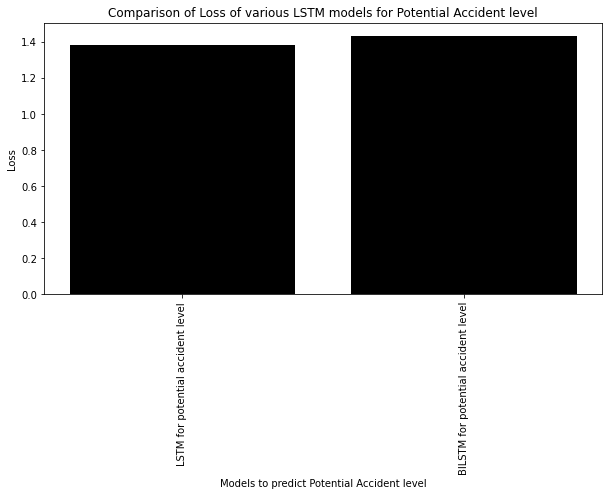

In [306]:
#Bar plot
fig = plt.figure(figsize = (10, 5)) 
plt.bar(model_LSTM_paccidentlevel_tf,loss_LSTM_paccidentlevel_tf, color ='black',width=0.8,) 
  
plt.xlabel("Models to predict Potential Accident level") 
plt.xticks(rotation = 'vertical')
plt.ylabel("Loss") 
plt.title("Comparison of Loss of various LSTM models for Potential Accident level") 
plt.show()

In [304]:
#Comparing accuracy
model_LSTM_a_paccidentlevel_tf = ["LSTM for potential accident level","BILSTM for potential accident level"]

accuracy_LSTM_paccidentlevel_tf = [model2t_accuracy,modelp_3_accuracy]
print(accuracy_LSTM_paccidentlevel_tf)

[0.4047619104385376, 0.380952388048172]


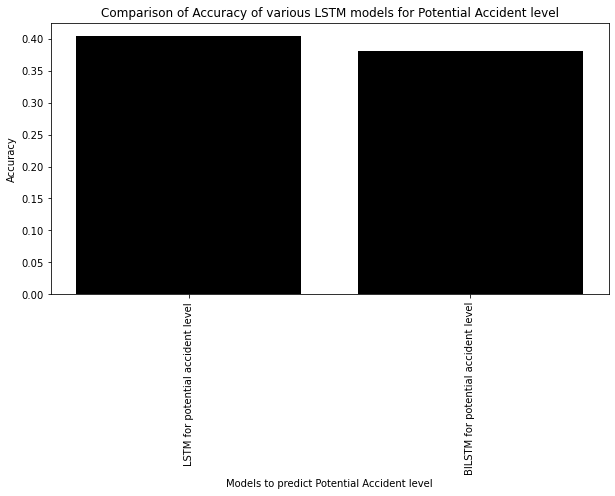

In [305]:
#Bar plot
fig = plt.figure(figsize = (10, 5)) 
plt.bar(model_LSTM_a_paccidentlevel_tf,accuracy_LSTM_paccidentlevel_tf, color ='black',width=0.8,) 
  
plt.xlabel("Models to predict Potential Accident level") 
plt.xticks(rotation = 'vertical')
plt.ylabel("Accuracy") 
plt.title("Comparison of Accuracy of various LSTM models for Potential Accident level") 
plt.show()

In [308]:
#Step 5: Choose the best performing model classifier and pickle it

Among the above applied classsifiers, the SVM model is performing the best for both the potential accident level and accident level as it is having high accuracy of about 77% for accident level and about 50% for potential accident level.The SVM model is performing better than the ANN classifier, LSTM and BILSTM classifiers.
Hence, the SVM model is to be pickled for both potential accident level and accident level.

In [309]:
#Pickling the model
#For accident level
import pickle
filename_accidentlevel = 'finalized_accidentlevelmodel.sav'
pickle.dump(grid, open(filename_accidentlevel, 'wb'))

In [310]:
#For potential accidnet level
#Pickling
import pickle
filename_potentialaccidentlevel= 'finalized_potential_accidentlevelmodel.sav'
pickle.dump(grid_p, open(filename_potentialaccidentlevel, 'wb'))